# Project Title: 

Sepsis Classification Machine Learning Project with FastAPI Deployment

# Business Understanding

## 1. Introduction
This project focuses on the early detection and classification of sepsis, a life-threatening medical condition. Sepsis is a critical concern in healthcare, and early diagnosis can significantly improve patient outcomes. The objective is to build a robust machine learning model for sepsis classification and deploy it into a web application using FastAPI, making it accessible for real-time predictions.

### 1.1. Objectives
- Understand the Data: 
The primary objective of this project is to gain a comprehensive understanding of the patient data, which includes various health-related features, demographics, and the presence or absence of sepsis. This understanding will empower healthcare professionals and decision-makers to make informed decisions regarding patient care and intervention.

- Predict Sepsis: 
Develop an accurate machine learning classification model that can predict the likelihood of a patient developing sepsis based on the provided features. Early and accurate sepsis prediction is crucial for timely medical intervention and improving patient outcomes.

- Web Application Integration: 
Integrate the trained sepsis classification model into a web application using FAST API. This web application will serve as a practical tool for healthcare practitioners to input patient data and receive real-time sepsis risk predictions, aiding in clinical decision-making.

### 1.2. Methodology
To achieve the project objectives, we will follow a structured approach:

- Data Loading and Exploration: 
Begin by loading and exploring the patient data, including features like age, vital signs, and medical history. This step will provide initial insights into the dataset and identify any data quality issues.

- Data Preprocessing: 
Handle missing values, perform feature engineering, and encode categorical variables as needed. Preprocessing steps will ensure that the data is ready for training the machine learning model.

- Model Development: 
Select and implement a suitable machine learning classification model for sepsis prediction. This model will be trained on historical patient data to learn patterns indicative of sepsis.

- Model Evaluation: 
Assess the model's performance using appropriate evaluation metrics such as accuracy, precision, recall, F1-score, and ROC-AUC. Rigorous evaluation will help identify the model's effectiveness in predicting sepsis cases.

- FAST API Integration: 
Integrate the trained machine learning model into a FAST API-based web application. This application will provide a user-friendly interface for healthcare professionals to input patient data and obtain sepsis risk predictions.

- Testing and Validation: 
Conduct thorough testing and validation of the web application to ensure its reliability and accuracy in real-time sepsis risk assessment.

- Documentation: 
Provide detailed documentation on how to use the web application, including input requirements and interpretation of results.

By following this methodology, we aim to provide healthcare professionals with a valuable tool for early sepsis detection and decision support, ultimately contributing to improved patient care and outcomes.

# Setup

## Installations

In [169]:
# %pip install imbalanced-learn

## Importation of Relevant Libraries

In [170]:
# Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Analysis
from scipy.stats import chi2_contingency

# Feature Processing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler

# Machine Learning Models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb


# Model Evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.model_selection import GridSearchCV

# Model Saving
import pickle

# Other Packages
import random
import warnings

warnings.filterwarnings("ignore")

## Data Loading

### Loading the Train and Test Datasets

#### Train Dataset

In [171]:
# Load The Train Dataset
train_df = pd.read_csv("data/Paitients_Files_Train.csv")
train_df.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


#### Test Dataset

In [172]:
# Load The Test Dataset
test_df = pd.read_csv("data/Paitients_Files_Test.csv")
test_df.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


Columns Description (Common to Both Datasets):

- ID: A unique identifier for each patient.
- PRG: Number of pregnancies (applicable only to females).
- PL: Plasma glucose concentration.
- PR: Diastolic blood pressure.
- SK: Triceps skinfold thickness.
- TS: 2-hour serum insulin.
- M11: Body mass index (BMI).
- BD2: Diabetes pedigree function.
- Age: Age of the patient.
- Insurance: Whether the patient has insurance coverage (1 for Yes, 0 for No).
Sepsis (Only in Test Dataset): The target variable indicating the presence or absence of sepsis (Positive for presence, Negative for absence).

Both datasets contain patient-related information, with the test dataset having an additional "Sepsis" column for target classification. The  dataset is designed for model training, while the test dataset will be used for model evaluation.

## Hypothesis

Null Hypothesis (H0): There is no significant association between the patient's age and the likelihood of sepsis.

Alternative Hypothesis (H1): There is a significant association between the patient's age and the likelihood of sepsis.

## Key Analytical Questions

i. Are there any correlations or patterns between the numerical features (e.g., PRG, PL, PR, SK, TS, M11, BD2, Age) and the presence of sepsis (Positive/Negative)?

ii. How does the distribution of key numerical variables (e.g., PR, SK, TS, M11) differ between patients with and without sepsis?

iii. Is there a relationship between the number of pregnancies (PRG) and plasma glucose concentration (PL)? Does this relationship vary with the presence of sepsis?

iv. Are there any significant differences in diastolic blood pressure (PR) between patients with different triceps skinfold thickness (SK) levels?

v. Does the body mass index (M11) vary significantly with 2-hour serum insulin (TS) levels?

vi. Is there a correlation between the diabetes pedigree function (BD2) and age? How does this correlation affect the likelihood of sepsis?

vii. Are patients with insurance coverage more likely to have certain health characteristics (e.g., higher age, higher BMI) compared to those without insurance coverage?

viii. Do certain combinations of numerical variables provide better predictive power for sepsis classification using machine learning models?

# Exploratory Data Analysis (EDA)

## Understanding the datasets

An in-depth exploration of the datasets is presented to gain insights into the available variables,their distributions and relationships. This step will provide an initial undertanding of the datasets to identify any data quality issues that will inform the cleaning and pre-processing.

### i. Column Information of The Datasets

In [173]:
# Column information of the test dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


- There are a total of 599 entries (rows) and 11 columns, each with a specific data type.
- The 'ID' column serves as a unique identifier for each patient. 
- The 'Sepssis' column contains categorical data (object) and represents the target variable indicating the presence or absence of sepsis.
- The remaining columns (PRG, PL, PR, SK, TS, M11, BD2, Age, and Insurance) contain numerical data.

In [174]:
# Column information of the test dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         169 non-null    object 
 1   PRG        169 non-null    int64  
 2   PL         169 non-null    int64  
 3   PR         169 non-null    int64  
 4   SK         169 non-null    int64  
 5   TS         169 non-null    int64  
 6   M11        169 non-null    float64
 7   BD2        169 non-null    float64
 8   Age        169 non-null    int64  
 9   Insurance  169 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 13.3+ KB


- There are a total of 169 entries (rows) and 10 columns, each with a specific data type.
- Similar to the Train dataset, the 'ID' column serves as a unique identifier for each patient.
- Unlike the Train dataset, the Test dataset does not include the 'Sepssis' column, as it is intended for evaluating sepsis predictions and doesn't contain the target variable.

### ii. Shape of The Datasets

In [175]:
# The shape of the train dataset
train_df.shape

(599, 11)

In [176]:
# The shape of the train dataset
test_df.shape

(169, 10)

### iii. Summary Statistics Datasets

In [177]:
# Summary Statistics of The Train Dataset
train_df.describe().round(3)

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000,599.000,599.000,599.000,599.000,599.000,599.000,599.000,599.000
mean,3.825,120.154,68.733,20.563,79.461,31.920,0.481,33.290,0.686
std,3.363,32.682,19.336,16.018,116.576,8.008,0.338,11.828,0.464
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,64.000,0.000,0.000,27.100,0.248,24.000,0.000
50%,3.000,116.000,70.000,23.000,36.000,32.000,0.383,29.000,1.000
75%,6.000,140.000,80.000,32.000,123.500,36.550,0.647,40.000,1.000
max,17.000,198.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


In [178]:
# Summary Statistics of The Test
test_df.describe().round(3)

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,169.000,169.000,169.000,169.000,169.000,169.000,169.000,169.000,169.000
mean,3.917,123.521,70.426,20.444,81.000,32.250,0.439,33.065,0.728
std,3.402,29.259,19.427,15.765,110.721,7.445,0.307,11.548,0.446
min,0.000,56.000,0.000,0.000,0.000,0.000,0.100,21.000,0.000
25%,1.000,102.000,62.000,0.000,0.000,27.600,0.223,24.000,0.000
50%,3.000,120.000,74.000,23.000,0.000,32.400,0.343,28.000,1.000
75%,6.000,141.000,80.000,32.000,135.000,36.600,0.587,42.000,1.000
max,13.000,199.000,114.000,49.000,540.000,57.300,1.698,70.000,1.000


i. PRG (Number of Pregnancies):
- The average number of pregnancies is approximately 3.92, suggesting that, on average, patients have had several pregnancies.
- The range of values varies from 0 (no pregnancies) to a maximum of 13 pregnancies.
- Similar to the Train dataset, the majority of patients fall within the range of 1 to 6 pregnancies.

ii. PL (Plasma Glucose Concentration):
- The mean plasma glucose concentration is around 123.52 mg/dL.
- The values range from a minimum of 56 mg/dL to a maximum of 199 mg/dL.
- Similar to the Train dataset, the standard deviation of 29.26 indicates some variability in glucose levels among patients.

iii. PR (Diastolic Blood Pressure):
- The mean diastolic blood pressure is approximately 70.43 mm Hg.
- The values range from a minimum of 0 mm Hg (which seems unusual) to a maximum of 114 mm Hg.
- Most patients have diastolic blood pressure levels within the range of 62 to 80 mm Hg.

iv. SK (Triceps Skinfold Thickness):
- The mean triceps skinfold thickness is around 20.44 mm.
- The values range from a minimum of 0 mm (which might indicate missing data) to a maximum of 49 mm.
- As in the Train dataset, there is notable variability in skinfold thickness among patients.

v. TS (2-Hour Serum Insulin):
- The mean 2-hour serum insulin level is approximately 81.00 μU/ml.
- The values have a wide range, with a minimum of 0 μU/ml and a maximum of 540 μU/ml.
- As in the Train dataset, there is significant variability in insulin levels among patients.

vi. M11 (Body Mass Index - BMI):
- The mean BMI is approximately 32.25, indicating that, on average, patients have a BMI in the overweight range.
- BMI values vary widely, with a minimum of 0.100 (unusually low) and a maximum of 57.30.
- The standard deviation of 7.45 suggests substantial variability in BMI among patients.

vii. BD2 (Diabetes Pedigree Function):
- The mean diabetes pedigree function value is 0.439, reflecting the diabetes history in family members.
- Values range from a minimum of 0.100 to a maximum of 1.698.
- Similar to the Train dataset, the spread in diabetes pedigree function values indicates varying family histories of diabetes.

viii. Age:
- The average age of patients is approximately 33.07 years, which is similar to the Train dataset.
- Ages range from a minimum of 21 years to a maximum of 70 years.
- Most patients fall within the range of 24 to 42 years.

ix. Insurance:
- About 72.8% of the patients have insurance coverage, based on the mean value, which is slightly higher than in the Train dataset.

### iv. Checking for Missing Values in The Datasets

In [179]:
# Check for missing values in the datasets
datasets = {'train': train_df, 'test': test_df}

def show_missing_values(datasets):
    for name, data in datasets.items():
        print(f"Missing values in the {name.capitalize()} dataset:")
        print(data.isnull().sum())
        print('===' * 18)
        print()

show_missing_values(datasets)

Missing values in the Train dataset:
ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

Missing values in the Test dataset:
ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
dtype: int64



Both datasets do not have any missing values

### v. Checking for Duplicates in The Datasets

In [180]:
# Check for duplicates in the Train dataset
train_duplicates = train_df[train_df.duplicated()]

# Check for duplicates in the Test dataset
test_duplicates = test_df[test_df.duplicated()]

# Display the duplicate rows in the Train dataset, if any
if not train_duplicates.empty:
    print("Duplicate Rows in Train Dataset:")
    print(train_duplicates)
else:
    print("No Duplicate Rows in Train Dataset")

# Display the duplicate rows in the Test dataset, if any
if not test_duplicates.empty:
    print("\nDuplicate Rows in Test Dataset:")
    print(test_duplicates)
else:
    print("No Duplicate Rows in Test Dataset")

No Duplicate Rows in Train Dataset
No Duplicate Rows in Test Dataset


# Univariate Analysis

## i. Univariate Analysis for 'PRG' (Number of Pregnancies)

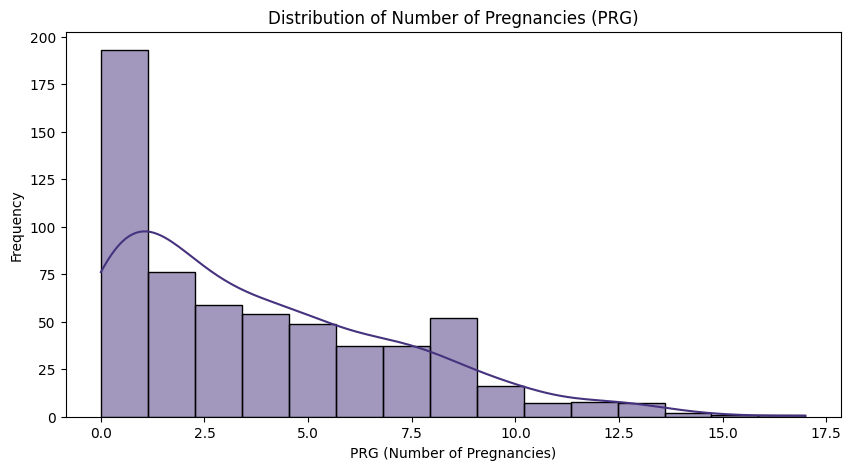

Summary Statistics for Number of Pregnancies (PRG):
count    599.000000
mean       3.824708
std        3.362839
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: PRG, dtype: float64


In [181]:
# Extract the 'PRG' column
prg_values = train_df['PRG']

# Plot a histogram
plt.figure(figsize=(10, 5))
sns.histplot(prg_values, kde=True, color=sns.color_palette('viridis')[0])
plt.title('Distribution of Number of Pregnancies (PRG)')
plt.xlabel('PRG (Number of Pregnancies)')
plt.ylabel('Frequency')
plt.show()

# Summary statistics
print('Summary Statistics for Number of Pregnancies (PRG):')
print(prg_values.describe())

- The average number of pregnancies is approximately 3.83, suggesting that, on average, patients have had several pregnancies.
- The range of values varies from 0 (no pregnancies) to a maximum of 17 pregnancies.
- The majority of patients fall within the range of 1 to 6 pregnancies.

## ii. Univariate Analysis for 'PL' (Plasma Glucose Concentration)

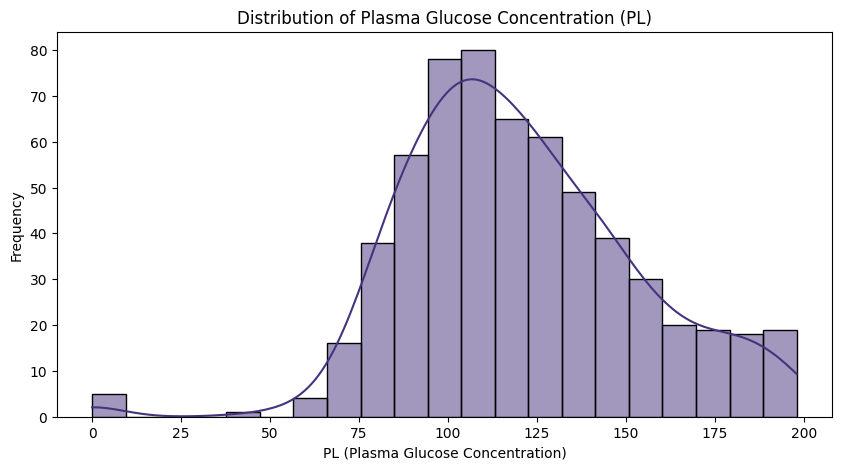

Summary Statistics for Plasma Glucose Concentration (PL):
count    599.000000
mean     120.153589
std       32.682364
min        0.000000
25%       99.000000
50%      116.000000
75%      140.000000
max      198.000000
Name: PL, dtype: float64


In [182]:
# Extract the 'PL' column
pl_values = train_df['PL']

# Plot a histogram
plt.figure(figsize=(10, 5))
sns.histplot(pl_values, kde=True, color=sns.color_palette('viridis')[0])
plt.title('Distribution of Plasma Glucose Concentration (PL)')
plt.xlabel('PL (Plasma Glucose Concentration)')
plt.ylabel('Frequency')
plt.show()

# Summary statistics
print('Summary Statistics for Plasma Glucose Concentration (PL):')
print(pl_values.describe())

- The mean plasma glucose concentration is around 120.15 mg/dL.
- The values range from a minimum of 0 mg/dL (which seems unusual) to a maximum of 198 mg/dL.
- The standard deviation of 32.68 indicates some variability in glucose levels among patients.

## iii. Univariate Analysis for 'PR' (Diastolic Blood Pressure)

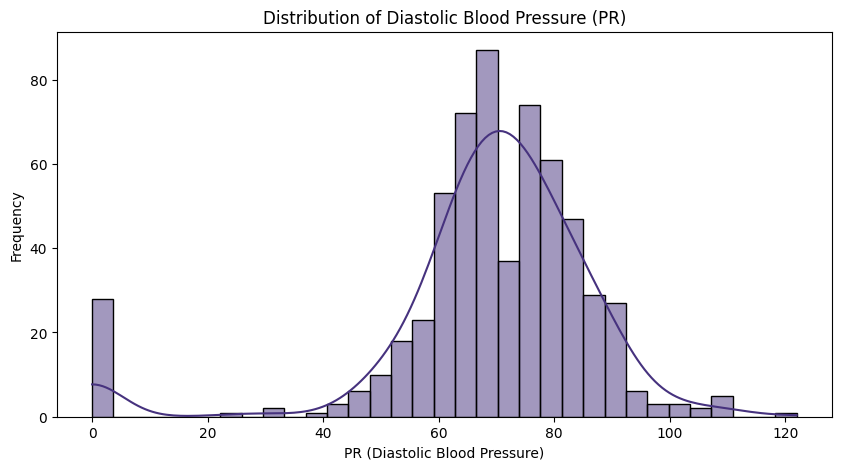

Summary Statistics for Diastolic Blood Pressure (PR):
count    599.000000
mean      68.732888
std       19.335675
min        0.000000
25%       64.000000
50%       70.000000
75%       80.000000
max      122.000000
Name: PR, dtype: float64


In [183]:
# Extract the 'PR' column
pr_values = train_df['PR']

# Plot a histogram
plt.figure(figsize=(10, 5))
sns.histplot(pr_values, kde=True, color=sns.color_palette('viridis')[0])
plt.title('Distribution of Diastolic Blood Pressure (PR)')
plt.xlabel('PR (Diastolic Blood Pressure)')
plt.ylabel('Frequency')
plt.show()

# Summary statistics
print('Summary Statistics for Diastolic Blood Pressure (PR):')
print(pr_values.describe())

- The mean diastolic blood pressure is approximately 68.73 mm Hg.
- The values range from a minimum of 0 mm Hg (which seems unusual) to a maximum of 122 mm Hg.
- Most patients have diastolic blood pressure levels within the range of 64 to 80 mm Hg.

## iv. Univariate Analysis for 'SK' (Triceps Skinfold Thickness)

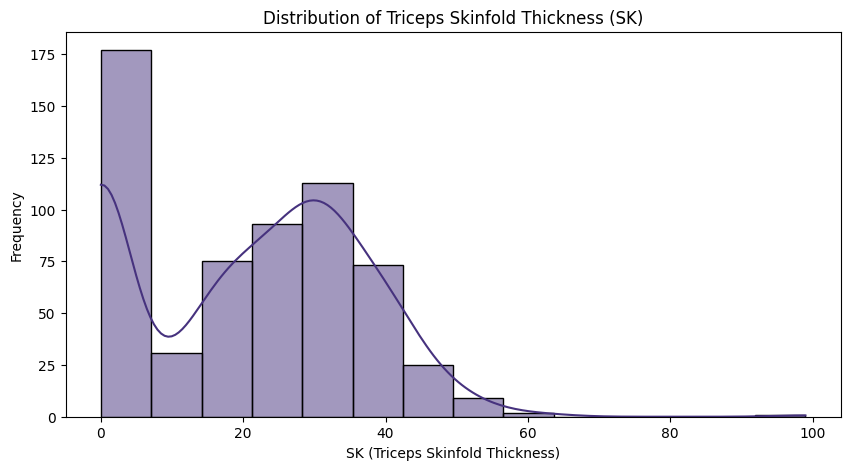

Summary Statistics for Triceps Skinfold Thickness (SK):
count    599.000000
mean      20.562604
std       16.017622
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SK, dtype: float64


In [184]:
# Extract the 'SK' column
sk_values = train_df['SK']

# Plot a histogram
plt.figure(figsize=(10, 5))
sns.histplot(sk_values, kde=True, color=sns.color_palette('viridis')[0])
plt.title('Distribution of Triceps Skinfold Thickness (SK)')
plt.xlabel('SK (Triceps Skinfold Thickness)')
plt.ylabel('Frequency')
plt.show()

# Summary statistics
print('Summary Statistics for Triceps Skinfold Thickness (SK):')
print(sk_values.describe())

- The mean triceps skinfold thickness is around 20.56 mm.
- There is a notable spread in skinfold thickness among patients.

## v. Univariate Analysis for 'TS' (2-Hour Serum Insulin)

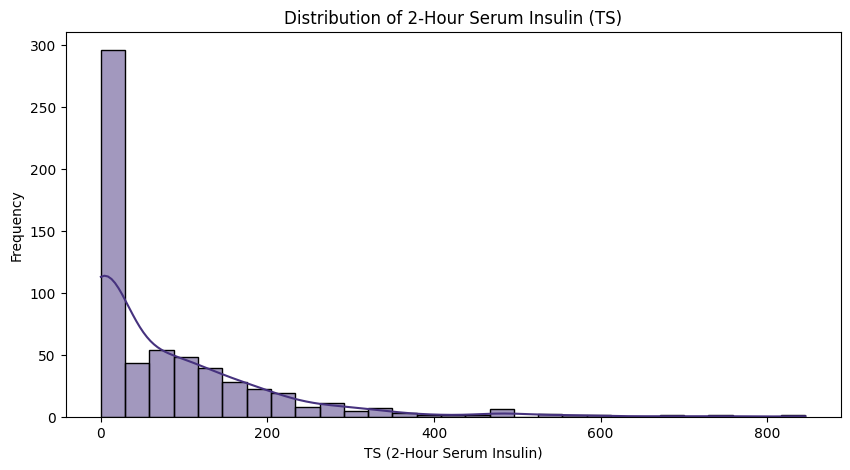

Summary Statistics for 2-Hour Serum Insulin (TS):
count    599.000000
mean      79.460768
std      116.576176
min        0.000000
25%        0.000000
50%       36.000000
75%      123.500000
max      846.000000
Name: TS, dtype: float64


In [185]:
# Extract the 'TS' column
ts_values = train_df['TS']

# Plot a histogram
plt.figure(figsize=(10, 5))
sns.histplot(ts_values, kde=True, color=sns.color_palette('viridis')[0])
plt.title('Distribution of 2-Hour Serum Insulin (TS)')
plt.xlabel('TS (2-Hour Serum Insulin)')
plt.ylabel('Frequency')
plt.show()

# Summary statistics
print('Summary Statistics for 2-Hour Serum Insulin (TS):')
print(ts_values.describe())

- The mean 2-hour serum insulin level is approximately 79.46 μU/ml.
- The values have a wide range, with a minimum of 0 μU/ml and a maximum of 846 μU/ml.
- The standard deviation of 116.58 suggests significant variability in insulin levels.

## vi. Univariate Analysis for 'M11' (Body Mass Index - BMI)

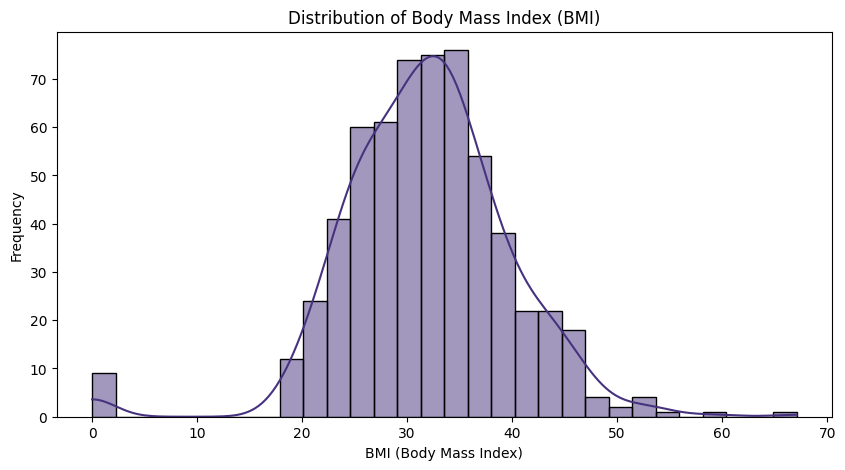

Summary Statistics for Body Mass Index (BMI):
count    599.000000
mean      31.920033
std        8.008227
min        0.000000
25%       27.100000
50%       32.000000
75%       36.550000
max       67.100000
Name: M11, dtype: float64


In [186]:
# Extract the 'M11' column
m11_values = train_df['M11']

# Plot a histogram
plt.figure(figsize=(10, 5))
sns.histplot(m11_values, kde=True, color=sns.color_palette('viridis')[0])
plt.title('Distribution of Body Mass Index (BMI)')
plt.xlabel('BMI (Body Mass Index)')
plt.ylabel('Frequency')
plt.show()

# Summary statistics
print('Summary Statistics for Body Mass Index (BMI):')
print(m11_values.describe())

- The mean BMI is approximately 31.92, indicating that, on average, patients have a BMI in the overweight range.
- BMI values vary widely, with a minimum of 0.078 (unusually low) and a maximum of 67.1.
- The standard deviation of 8.01 suggests substantial variability in BMI among patients.

## vii. BD2 (Diabetes Pedigree Function)

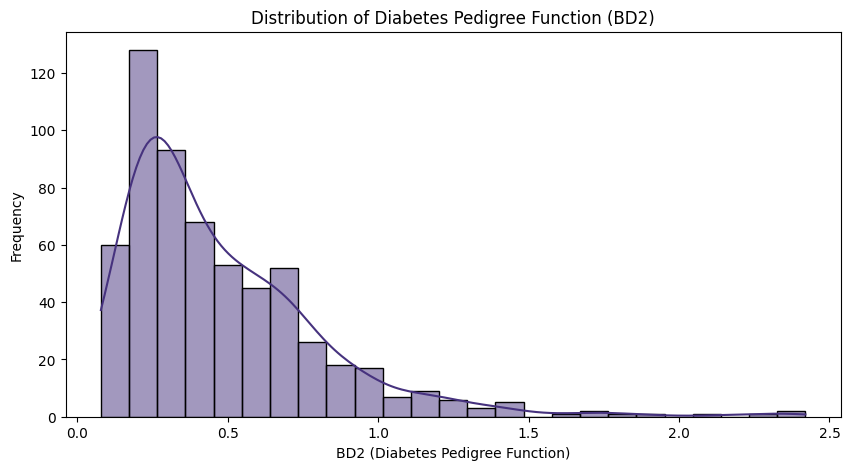

Summary Statistics for Diabetes Pedigree Function (BD2):
count    599.000000
mean       0.481187
std        0.337552
min        0.078000
25%        0.248000
50%        0.383000
75%        0.647000
max        2.420000
Name: BD2, dtype: float64


In [187]:
# Extract the 'BD2' column
bd2_values = train_df['BD2']

# Plot a histogram
plt.figure(figsize=(10, 5))
sns.histplot(bd2_values, kde=True, color=sns.color_palette('viridis')[0])
plt.title('Distribution of Diabetes Pedigree Function (BD2)')
plt.xlabel('BD2 (Diabetes Pedigree Function)')
plt.ylabel('Frequency')
plt.show()

# Summary statistics
print('Summary Statistics for Diabetes Pedigree Function (BD2):')
print(bd2_values.describe())

- The mean diabetes pedigree function value is 0.481, which reflects the diabetes history in family members.
- Values range from a minimum of 0.078 to a maximum of 2.42.
- The spread in diabetes pedigree function values indicates varying family histories of diabetes.

## viii. Univariate Analysis for 'Age'

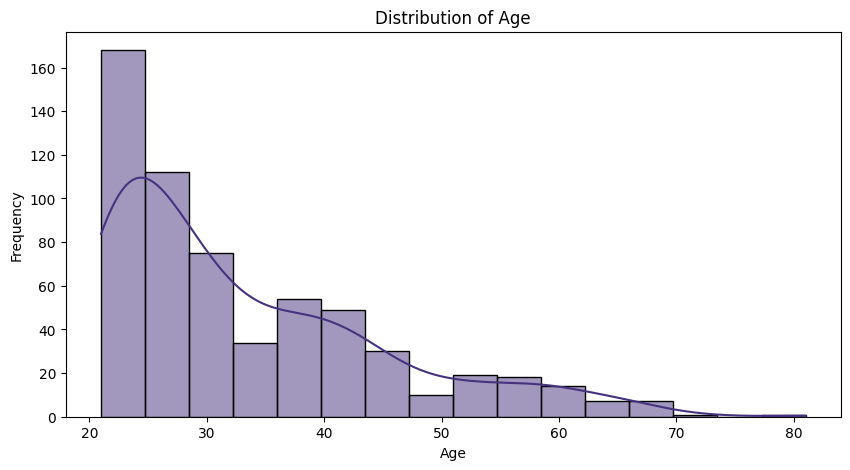

Summary Statistics for Age:
count    599.000000
mean      33.290484
std       11.828446
min       21.000000
25%       24.000000
50%       29.000000
75%       40.000000
max       81.000000
Name: Age, dtype: float64


In [188]:
# Extract the 'Age' column
age_values = train_df['Age']

# Plot a histogram
plt.figure(figsize=(10, 5))
sns.histplot(age_values, kde=True, color=sns.color_palette('viridis')[0])
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Summary statistics
print('Summary Statistics for Age:')
print(age_values.describe())

- The average age of patients is approximately 33.29 years.
- Ages range from a minimum of 21 years to a maximum of 81 years.
- Most patients fall within the range of 24 to 40 years.

## ix.Univariate Analysis for 'Insurance'

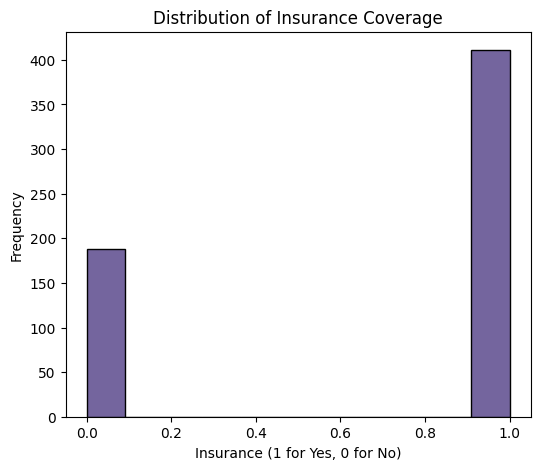

Summary Statistics for Insurance Coverage:
count    599.000000
mean       0.686144
std        0.464447
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Insurance, dtype: float64


In [189]:
# Extract the 'Insurance' column
insurance_values = train_df['Insurance']

# Plot a histogram
plt.figure(figsize=(6, 5))
sns.histplot(insurance_values, kde=False, color=sns.color_palette('viridis')[0])
plt.title('Distribution of Insurance Coverage')
plt.xlabel('Insurance (1 for Yes, 0 for No)')
plt.ylabel('Frequency')
plt.show()

# Summary statistics
print('Summary Statistics for Insurance Coverage:')
print(insurance_values.describe())

- About 68.6% of the patients have insurance coverage, based on the mean value.

## x.Univariate Analysis for 'Sepsis'

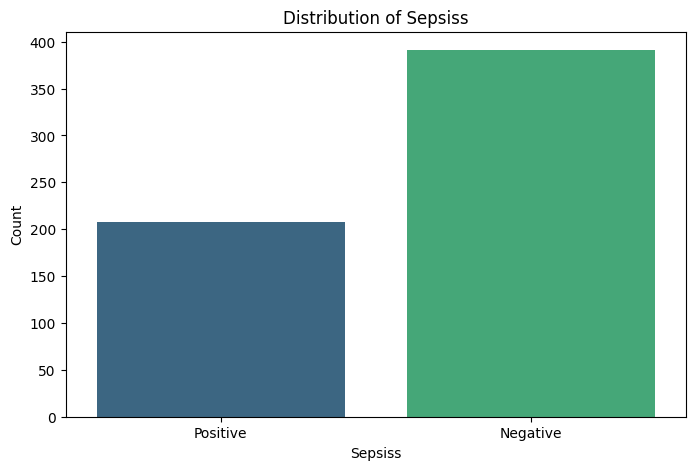

Insights for the Distribution of Sepsiss:
- There are 208 patients with sepsis (Positive) and 391 patients without sepsis (Negative).
- The distribution shows an imbalance, with more patients without sepsis.


In [190]:
# Plot the distribution of Sepsiss
plt.figure(figsize=(8, 5))
sns.countplot(data=train_df, x='Sepssis', palette='viridis')
plt.title('Distribution of Sepsiss')
plt.xlabel('Sepsiss')
plt.ylabel('Count')
plt.show()


# Insights
sepsis_counts = train_df['Sepssis'].value_counts()
print("Insights for the Distribution of Sepsiss:")
print(f"- There are {sepsis_counts['Positive']} patients with sepsis (Positive) and {sepsis_counts['Negative']} patients without sepsis (Negative).")
print("- The distribution shows an imbalance, with more patients without sepsis.")

# Bivariate Analysis

- The bivariate analysis will focus on investigating the relationship between age and the various health-related variables. 


- Analyzing the relationship between age and other relevant variables in relation to sepsis is essential because understanding how age interacts with these variables can provide valuable insights into the risk factors, progression, and management of sepsis across different age groups. 


- Sepsis is a complex medical condition influenced by various factors, and age is a fundamental demographic variable that can significantly impact the likelihood of its occurrence and its outcomes. 


- Examining age-specific patterns and associations with variables such as blood pressure, plasma glucose concentration, and other health indicators can identify age-related trends, assess the vulnerability of different age groups to sepsis, and tailor medical interventions and preventive strategies accordingly. 


- This analysis helps us develop a more comprehensive understanding of sepsis and the age-specific dynamics of the disease.


- To achieve this, we need to group patients into distinct age groups so that we can explore how specific age groups might be associated with different medical complications or characteristics relevant to sepsis.

In [191]:
# Creating the Age Group Column
# Define age intervals
age_intervals = [20, 40, 60, 80, 90]
age_labels = ['20-39', '40-59', '60-79', '80-90']

# Create labels for age intervals
train_df['Age Group'] = pd.cut(train_df['Age'], bins=age_intervals, labels=age_labels)

# Add a new column 'Age Group' based on age intervals
train_df['Age Group'] = pd.cut(train_df['Age'], bins=age_intervals, labels=age_labels)
train_df.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis,Age Group
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive,40-59
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative,20-39
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive,20-39
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative,20-39
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive,20-39


- The generated age groups span from 20 to 90 years, ensuring that patients within each group share more or less the same medical complications or attributes that might be relevant to sepsis. 


- This categorization allows for a more focused and targeted analysis of how age impacts various health-related variables, providing insights into sepsis assessment and management across different age ranges.

## i. Bivariate Analysis between Age and Number of Pregnancies (PRG)

- Analyzing the relationship between age and the number of pregnancies in the context of sepsis is crucial for understanding potential health implications, especially for women. The number of pregnancies (parity) can significantly impact a woman's health and may influence her susceptibility to various medical conditions, including sepsis.


- Investigating how the number of pregnancies relates to age is essential to determine whether women with higher parity become more susceptible to sepsis as they age. This analysis can shed light on whether specific age groups of women might require more attention and care in terms of sepsis risk assessment and prevention.


- Sepsis is a medical emergency that can affect individuals of all ages, making it important to explore how age might influence its occurrence. By examining age-specific trends in the number of pregnancies, we can identify potential age groups that may be at higher risk of sepsis due to their reproductive history.

In [192]:
# Calculate the average number of pregnancies ('PRG') per age group and round to the nearest whole number
average_pregnancies_by_age = train_df.groupby('Age Group')['PRG'].mean().round().reset_index()

# Rename the columns for clarity
average_pregnancies_by_age.columns = ['Age Group', 'Average Pregnancies']

# Display the DataFrame
average_pregnancies_by_age

,Age Group,Average Pregnancies
0,20-39,3.0
1,40-59,7.0
2,60-79,4.0
3,80-90,9.0


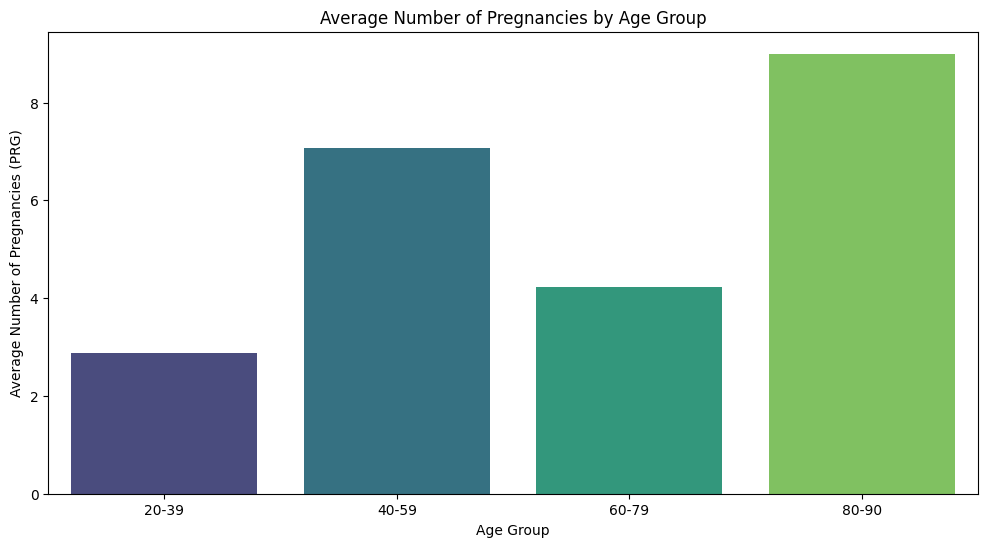

In [193]:
# Create a bar plot to visualize the average number of pregnancies ('PRG') by age group
plt.figure(figsize=(12, 6))
sns.barplot(data=train_df, x='Age Group', y='PRG', palette='viridis', ci=None)
plt.title('Average Number of Pregnancies by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Number of Pregnancies (PRG)')
plt.xticks(rotation=0)
plt.show()

The analysis of age against the average number of pregnancies reveals distinct patterns across different age groups.

- Women in the 20-39 age group have an average of 3 pregnancies, while those in the 40-59 age group have a significantly higher average of 7 pregnancies.


- In the 60-79 age group, the average number of pregnancies decreases to 4, likely due to the onset of menopause in many women.


- The 80-90 age group shows the highest average of 9 pregnancies, reflecting the childbearing practices of earlier generations.


The relationship between age and the average number of pregnancies in the context of sepsis analysis highlights the impact of generational and life stage factors. While younger women tend to have fewer pregnancies, the older age groups show variations influenced by historical trends and the onset of menopause. Understanding these age-related patterns is essential for sepsis assessment, as it underscores the importance of considering demographic and life stage variables when studying the disease.


Older women may have specific healthcare needs related to their reproductive history, which could impact their susceptibility to sepsis.

## ii. Bivariate Analysis between 'Age' and 'PL' (Age vs. Plasma Glucose Concentration)

Plasma Glucose Concentration (PL) and age are critical factors in the context of sepsis. Elevated PL levels, often due to diabetes or stress-induced hyperglycemia, can weaken the immune system, increasing sepsis risk. Sepsis can affect all age groups, but its presentation varies with age. Understanding these factors is crucial for sepsis detection and management.

In [194]:
# Calculate the mean 'PL' for each age group
age_vs_pl_mean = train_df.groupby('Age Group')['PL'].mean().reset_index()

# Rename the columns for clarity
age_vs_pl_mean.columns = ['Age Group', 'Mean PL']

# Display the DataFrame
age_vs_pl_mean

,Age Group,Mean PL
0,20-39,116.669623
1,40-59,129.563492
2,60-79,137.857143
3,80-90,134.000000


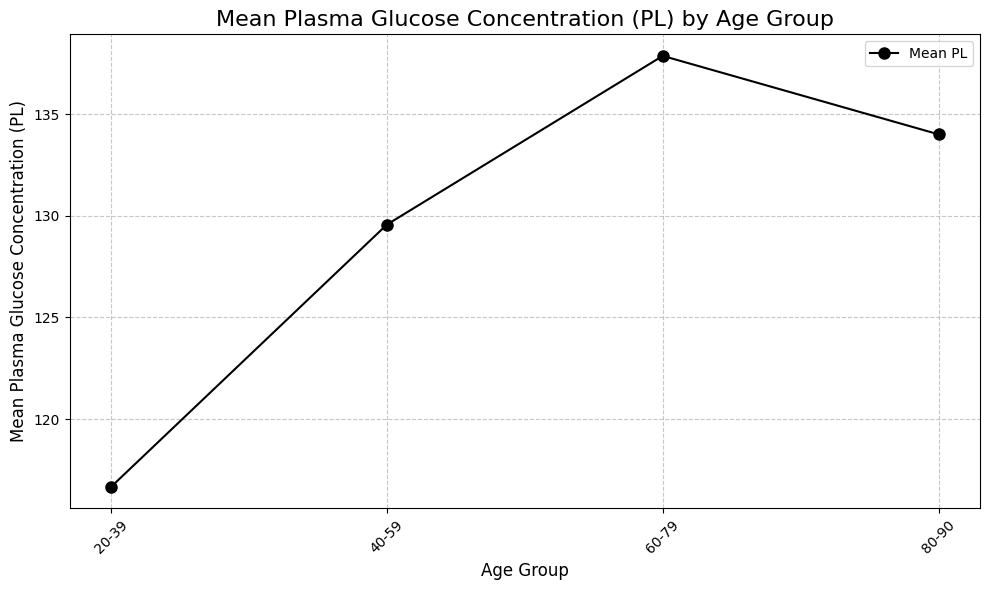

In [195]:
# Calculate the mean 'PL' for each age group
age_vs_pl_mean = train_df.groupby('Age Group')['PL'].mean().reset_index()
age_vs_pl_mean.columns = ['Age Group', 'Mean PL']

# Create a Matplotlib figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create the line plot
plt.plot(age_vs_pl_mean['Age Group'], age_vs_pl_mean['Mean PL'], marker='o', markersize=8, color='black', label='Mean PL', linestyle='-')

# Customize plot aesthetics
plt.title('Mean Plasma Glucose Concentration (PL) by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Mean Plasma Glucose Concentration (PL)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

- In the age group of 20-40, the mean plasma glucose concentration is approximately 116.67. This group represents younger individuals, and their mean PL falls within the expected range for their age.


- As individuals age into the 40-60 group, the mean PL increases to approximately 129.56. This uptrend suggests that plasma glucose concentration tends to rise with age within this age bracket.


- Moving into the 60-80 age group, the mean PL further increases to about 137.86. This observation signifies a notable elevation in plasma glucose concentration among individuals in this age range, which may be associated with age-related factors or underlying health conditions.


- Lastly, in the 80-90 age group, the mean PL remains relatively stable at 134. This age group, representing the elderly, maintains a moderately high plasma glucose concentration.


- These insights highlight the relationship between age and plasma glucose concentration, indicating a progressive increase in plasma glucose concentration ('PL') with advancing age, particularly from middle age to old age.

Older age groups may be at higher risk of sepsis due to elevated PL levels, emphasizing the importance of monitoring and managing blood glucose in sepsis prevention.

## iii. Bivariate Analysis between 'Age' and 'PR' (Age vs. Diastolic Blood Pressure)

The relationship between 'Age' and 'PR' (Diastolic Blood Pressure) is essential to understand their potential impact on sepsis. Diastolic blood pressure ('PR') is a crucial cardiovascular parameter that varies with age and can be indicative of overall cardiovascular health. Age, on the other hand, is a significant factor in sepsis risk, as sepsis can affect individuals across different age groups, but its presentation and severity may vary.

To visualize this relationship more clearly, we'll group patients into age intervals and examine the mean diastolic blood pressure within each group.

In [196]:
# Calculate the mean 'PR' for each age group
age_vs_pr_mean = train_df.groupby('Age Group')['PR'].mean().reset_index()

# Rename the columns for clarity
age_vs_pr_mean.columns = ['Age Group', 'Mean PR']

# Display the DataFrame
age_vs_pr_mean

,Age Group,Mean PR
0,20-39,66.567627
1,40-59,75.690476
2,60-79,73.238095
3,80-90,74.000000


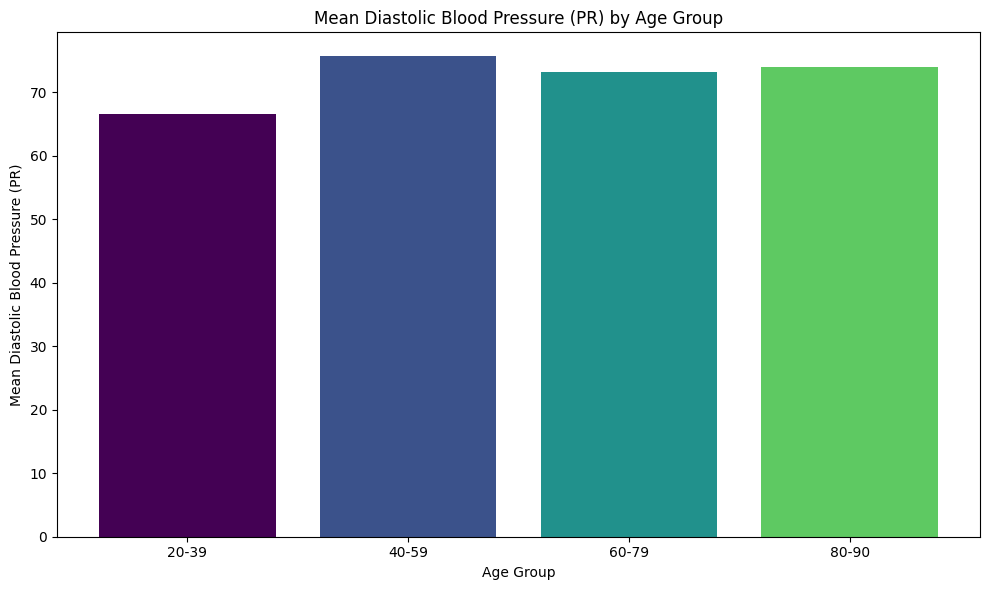

In [197]:
# Calculate the mean 'PR' for each age group
age_vs_pr_mean = train_df.groupby('Age Group')['PR'].mean().reset_index()
age_vs_pr_mean.columns = ['Age Group', 'Mean PR']

# Set the Viridis color palette
viridis_colors = plt.cm.viridis(age_vs_pr_mean.index / len(age_vs_pr_mean))

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(age_vs_pr_mean['Age Group'], age_vs_pr_mean['Mean PR'], color=viridis_colors)
plt.title('Mean Diastolic Blood Pressure (PR) by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Mean Diastolic Blood Pressure (PR)')

# Show the plot
plt.tight_layout()
plt.show()

The analysis of diastolic blood pressure ('PR') across different age groups reveals distinct trends.
- In the 20-39 age group, the mean diastolic blood pressure is approximately 66.57 mm Hg.
- The 40-59 age group shows a higher mean PR of about 75.69 mm Hg.
- The 60-79 age group exhibits a mean PR of 73.24 mm Hg.
- The 80-90 age group has a mean PR of 74.00 mm Hg.

The relationship observed between age and diastolic blood pressure ('PR') suggests that there is a correlation between these two variables. As age increases, there is a tendency for diastolic blood pressure levels to also increase, with the 40-59 age group showing the highest mean PR.


Higher diastolic blood pressure in middle-aged individuals may contribute to an increased risk of sepsis, highlighting the need for cardiovascular health assessments in sepsis prevention.

## iv. Bivariate Analysis between 'Age' and 'M11' (Age vs. BMI)

- The analysis of the relationship between age and Body Mass Index (BMI) is important in the context of sepsis as both factors can influence a patient's susceptibility to sepsis and its management.


- BMI, a measure of body weight relative to height, can provide insights into a patient's overall health and nutritional status.


- Age, on the other hand, can impact how the body responds to infections and inflammation, which are central to sepsis.


- By examining how BMI changes with age, we can better understand how age-related changes in metabolism and body composition may affect the risk and outcomes of sepsis. 


- This analysis will help identify age groups that may be more vulnerable to sepsis due to their BMI levels and guide healthcare professionals in tailoring interventions and care strategies accordingly.

In [198]:
# Calculate the mean 'PR' for each age group
age_vs_bmi_mean = train_df.groupby('Age Group')['M11'].mean().reset_index()

# Rename the columns for clarity
age_vs_bmi_mean.columns = ['Age Group', 'Mean M11']

# Display the DataFrame
age_vs_bmi_mean

,Age Group,Mean M11
0,20-39,31.690244
1,40-59,33.312698
2,60-79,28.785714
3,80-90,25.900000


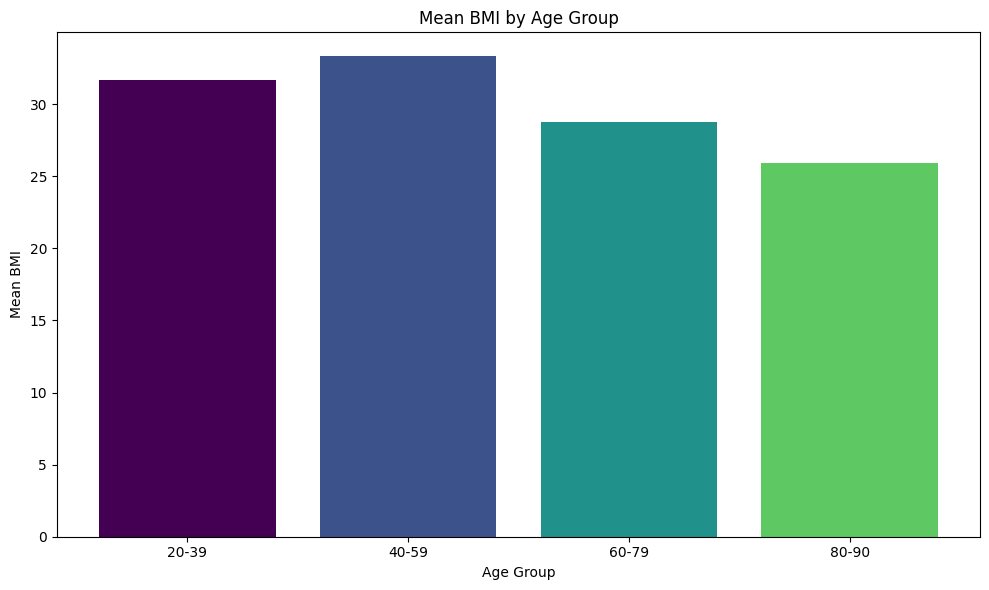

In [199]:
# Calculate the mean 'M11' for each age group
age_vs_bmi_mean = train_df.groupby('Age Group')['M11'].mean().reset_index()
age_vs_bmi_mean.columns = ['Age Group', 'Mean M11']

# Set the Viridis color palette
viridis_colors = plt.cm.viridis(age_vs_bmi_mean.index / len(age_vs_bmi_mean))

# Create the bar plot with the Viridis palette
plt.figure(figsize=(10, 6))
plt.bar(age_vs_bmi_mean['Age Group'], age_vs_bmi_mean['Mean M11'], color=viridis_colors)
plt.title('Mean BMI by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Mean BMI')

# Show the plot
plt.tight_layout()
plt.show()

- Individuals in the 40-59 age group exhibit the highest mean BMI (33.31), indicating a higher prevalence of overweight or obesity in this age range.


- In contrast, those aged 80-90 have the lowest mean BMI (25.90), suggesting a trend toward lower body weight in this older age group.

- The 20-39 age group shows a moderately high mean BMI (31.69), indicating a considerable proportion of individuals with higher body weight.


- Interestingly, the 60-79 age group falls in between, with a mean BMI of 28.79.


The relationship between age and BMI highlights that BMI tends to increase from younger to middle-aged adults, peaking in the 40-59 age group, and then gradually decreasing in the older age categories. This pattern may reflect lifestyle changes, metabolic shifts, or medical conditions associated with aging.

With regards to Sepsis, middle-aged individuals may have specific risks related to their BMI, while older age groups may have different risk factors to consider in sepsis management.

## v. Bivariate Analysis between 'Age' and 'BD2' (Age vs. Diabetes Pedigree Function)

Understanding how age interacts with BD2, a measure associated with the genetic predisposition to diabetes, is valuable for gaining insights into the risk factors and potential connections between age and diabetes-related health conditions, which can influence the likelihood and severity of sepsis. Analyzing this relationship allows us to assess whether BD2 levels vary significantly across different age groups, providing a better understanding of how age-related factors might contribute to the susceptibility or management of sepsis in various age cohorts. By investigating age-specific patterns in BD2, we aim to uncover potential correlations that could inform sepsis risk assessments and interventions tailored to specific age demographics.

In [200]:
# Calculate the mean 'BD2' for each age group
age_vs_bd2_mean = train_df.groupby('Age Group')['BD2'].mean().reset_index()

# Rename the columns for clarity
age_vs_bd2_mean.columns = ['Age Group', 'Diabetes Pedigree Function']


age_vs_bd2_mean

,Age Group,Diabetes Pedigree Function
0,20-39,0.480160
1,40-59,0.488405
2,60-79,0.460952
3,80-90,0.460000


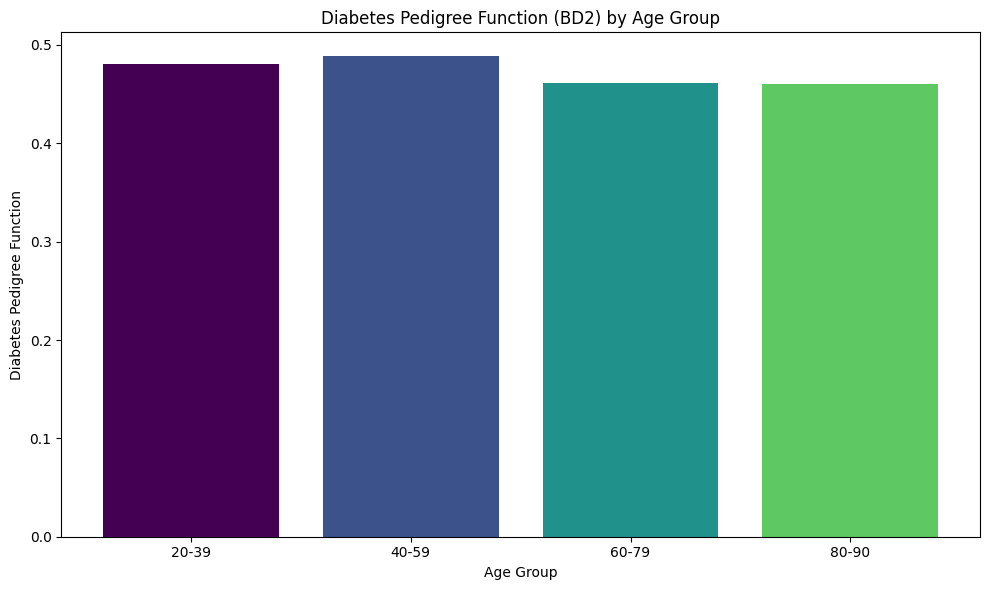

In [201]:
# Calculate the mean 'BD2' for each age group
age_vs_bd2_mean = train_df.groupby('Age Group')['BD2'].mean().reset_index()

# Set the Viridis color palette
viridis_colors = plt.cm.viridis(age_vs_bd2_mean.index / len(age_vs_bd2_mean))

# Create the bar plot with the Viridis palette
plt.figure(figsize=(10, 6))
plt.bar(age_vs_bd2_mean['Age Group'], age_vs_bd2_mean['BD2'], color=viridis_colors)
plt.title('Diabetes Pedigree Function (BD2) by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Diabetes Pedigree Function')

# Show the plot
plt.tight_layout()
plt.show()

The analysis of the relationship between age and the Diabetes Pedigree Function (BD2) reveals relatively consistent values across different age groups. 

- The mean BD2 remains relatively stable, ranging from approximately 0.460 to 0.488, with no significant upward or downward trend observed with increasing age. 


- This suggests that age may not be a prominent factor influencing variations in BD2 among the analyzed age groups. 

While other factors may contribute to differences in BD2, such as genetic predisposition and family history of diabetes, the age factor does not appear to be a major driver of these variations within the given dataset.

## vi. Bivariate Analysis between 'Age' and 'Sepssis' (Age vs. Sepsiss)

In [202]:
# Separate positive and negative cases into two DataFrames
positive_df = train_df[train_df['Sepssis'] == 'Positive']
negative_df = train_df[train_df['Sepssis'] == 'Negative']

# Create DataFrames showing the counts for each age group
sepsis_positive_counts = positive_df['Age Group'].value_counts().reset_index()
sepsis_negative_counts = negative_df['Age Group'].value_counts().reset_index()

# Display the DataFrames
print("Sepsis Positive Counts:")
sepsis_positive_counts

Sepsis Positive Counts:


,Age Group,count
0,20-39,132
1,40-59,71
2,60-79,5
3,80-90,0


In [203]:
# Separate positive and negative cases into two DataFrames
positive_df = train_df[train_df['Sepssis'] == 'Positive']
negative_df = train_df[train_df['Sepssis'] == 'Negative']

# Create DataFrames showing the counts for each age group
sepsis_positive_counts = positive_df['Age Group'].value_counts().reset_index()
sepsis_positive_counts.columns = ['age group', 'count']

sepsis_negative_counts = negative_df['Age Group'].value_counts().reset_index()
sepsis_negative_counts.columns = ['age group', 'count']

# Display the DataFrames
print("Sepsis Positive Counts:")
sepsis_positive_counts

Sepsis Positive Counts:


,age group,count
0,20-39,132
1,40-59,71
2,60-79,5
3,80-90,0


In [204]:
print("\nSepsis Negative Counts:")
sepsis_negative_counts


Sepsis Negative Counts:


,age group,count
0,20-39,319
1,40-59,55
2,60-79,16
3,80-90,1


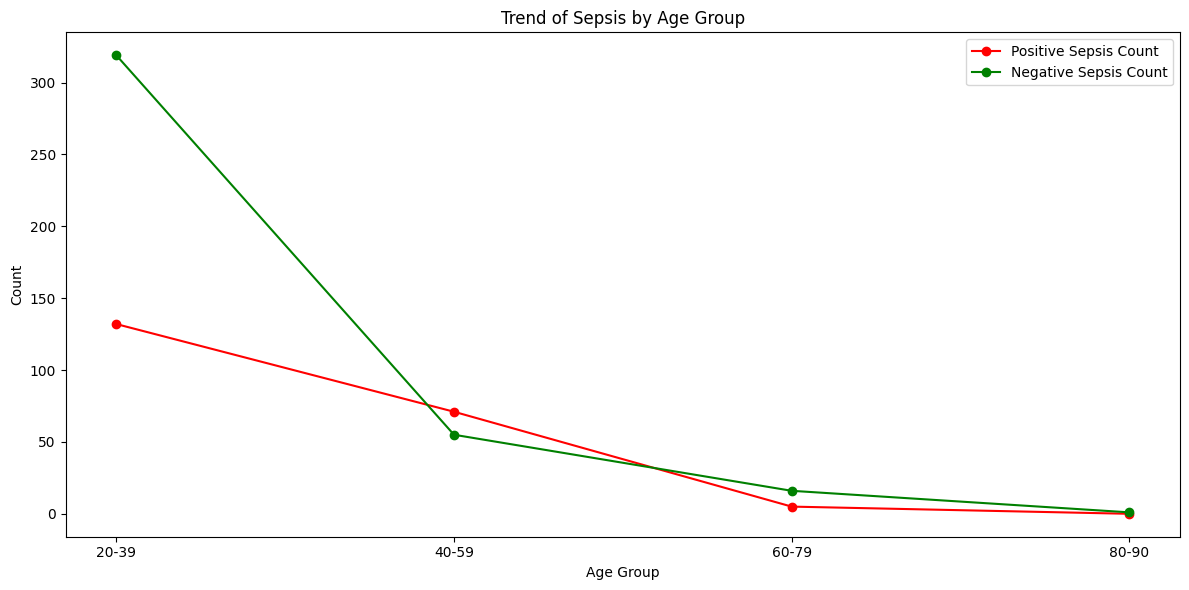

In [205]:
# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(sepsis_positive_counts['age group'], sepsis_positive_counts['count'], marker='o', color='red', label='Positive Sepsis Count')
plt.plot(sepsis_negative_counts['age group'], sepsis_negative_counts['count'], marker='o', color='green', label='Negative Sepsis Count')
plt.title('Trend of Sepsis by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

In [206]:
# Group the data by 'Age Group' and count the number of participants in each group
age_group_counts = train_df['Age Group'].value_counts().reset_index()
age_group_counts.columns = ['Age Group', 'Participant Count']

# Sort the DataFrame by 'Age Group'
age_group_counts = age_group_counts.sort_values(by='Age Group')

# Display the DataFrame
age_group_counts

,Age Group,Participant Count
0,20-39,451
1,40-59,126
2,60-79,21
3,80-90,1


i. 20-39 Age Group (Highest Participant Count):

- The '20-39' age group has the highest number of participants, with 451 individuals.
- Given its larger sample size, this age group provides a more extensive pool of individuals for sepsis cases to be identified. - Consequently, it's more likely to observe a higher number of both positive and negative sepsis cases in this age group.


ii. 40-59 Age Group:

- The '40-59' age group, while having a substantial number of participants (126 individuals), is smaller in comparison to the '20-39' age group.
- This age group still provides a reasonable sample size for sepsis cases, resulting in a notable number of both positive and negative cases.


iii. 60-79 Age Group:

- The '60-79' age group has a significantly lower number of participants, with only 21 individuals.
- With a smaller sample size, the likelihood of identifying sepsis cases, both positive and negative, is reduced. This is evident in the much lower counts of cases in this age group.

iv. 80-90 Age Group (Lowest Participant Count):

- The '80-90' age group has the lowest number of participants, with only 1 individual.
- Due to the extremely small sample size, it becomes highly challenging to make meaningful observations about sepsis cases in this age group. With only one participant, there's very limited data available.

In summary, the variation in the number of participants across age groups directly impacts the ability to detect and analyze sepsis cases. Larger sample sizes, such as in the '20-39' and '40-59' age groups, provide more statistical power to identify and study sepsis cases, whereas smaller sample sizes, as seen in the '60-79' and '80-90' age groups, limit the ability to draw meaningful conclusions about sepsis incidence. 

The relationship between Age and Sepsis will be examined from a Statistical persective by performing a Hypothesis Test

# Hypothesis Testing and Answering Key Analytical Questions

## Hypothesis Testing

Null Hypothesis (H0): There is no significant association between the patient's age and the likelihood of sepsis.

Alternative Hypothesis (H1): There is a significant association between the patient's age and the likelihood of sepsis.

In [207]:
# Create a contingency table of Age vs. Sepsis
contingency_table = pd.crosstab(train_df['Age Group'], train_df['Sepssis'])

# Perform the Chi-Square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Define the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha
if p < alpha:
    print("Reject the null hypothesis")
    print("There is a significant association between age and sepsis.")
else:
    print("Fail to reject the null hypothesis")
    print("There is no significant association between age and sepsis.")

# Print the Chi-Square statistic and p-value
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

Reject the null hypothesis
There is a significant association between age and sepsis.
Chi-Square Statistic: 33.55383159633323
P-value: 2.460922116459635e-07


The Chi-Square test results indicate that we should reject the null hypothesis, as the p-value (approximately 2.46e-07) is significantly smaller than the chosen significance level (alpha) of 0.05. This means that there is a statistically significant association between a patient's age (in different age groups) and the likelihood of sepsis.

## Answering Key Analytical Questions

### i. Are there any correlations or patterns between the numerical features (e.g., PRG, PL, PR, SK, TS, M11, BD2, Age) and the presence of sepsis (Positive/Negative)?


In [208]:
train_df.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis,Age Group
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive,40-59
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative,20-39
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive,20-39
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative,20-39
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive,20-39


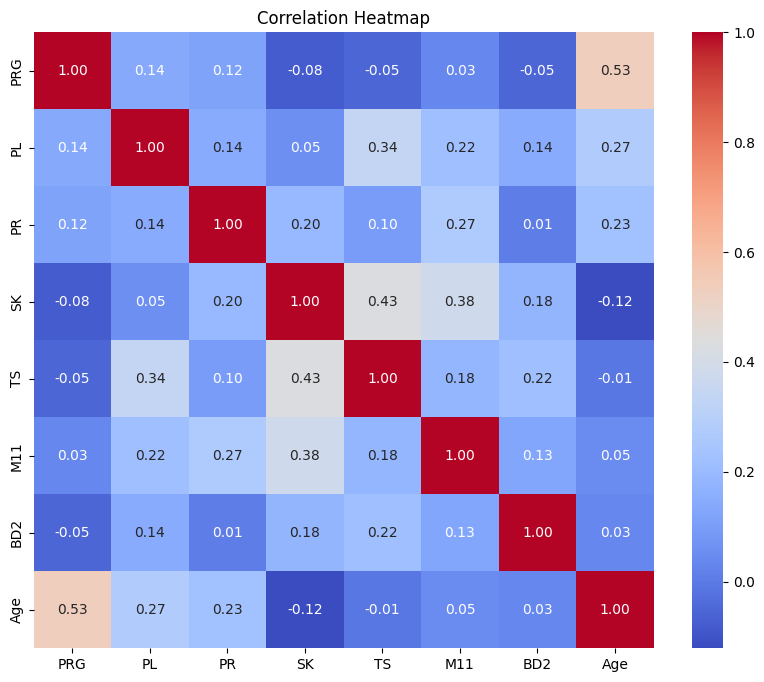

In [209]:
# Calculate the correlation matrix
corr_matrix = train_df[['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age']].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Age and Number of Pregnancies (PRG): There is a moderately positive correlation (0.53) between the number of pregnancies (PRG) and age. This suggests that, on average, older individuals tend to have more pregnancies.

Plasma Glucose (PL) and 2-Hour Serum Insulin (TS): Plasma glucose (PL) and 2-hour serum insulin (TS) exhibit a moderate positive correlation (0.34). This correlation indicates that higher plasma glucose levels are associated with higher 2-hour serum insulin levels.

Plasma Glucose (PL) and Diastolic Blood Pressure (PR): There is a positive correlation (0.14) between plasma glucose (PL) and diastolic blood pressure (PR). This suggests that higher plasma glucose levels may be associated with higher diastolic blood pressure.

Skinfold Thickness (SK) and 2-Hour Serum Insulin (TS): Skinfold thickness (SK) and 2-hour serum insulin (TS) have a relatively strong positive correlation (0.43). This implies that individuals with higher skinfold thickness may tend to have higher 2-hour serum insulin levels.

Age and Skinfold Thickness (SK): There is a negative correlation (-0.12) between age and skinfold thickness (SK). This suggests that, on average, older individuals may have lower skinfold thickness.

Pregnancies (PRG) and Diastolic Blood Pressure (PR): The correlation between the number of pregnancies (PRG) and diastolic blood pressure (PR) is relatively low (0.12), indicating a weak positive relationship.

Age and Diabetes Pedigree Function (BD2): Age and the diabetes pedigree function (BD2) have a weak positive correlation (0.05), suggesting that age and the diabetes pedigree function are somewhat related, but the relationship is not strong.

### ii. How does the distribution of key numerical variables (e.g., PR, SK, TS, M11) differ between patients with and without sepsis?

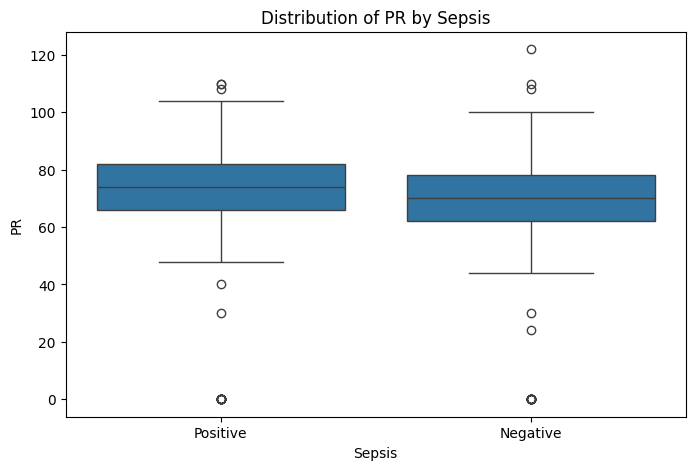

In [210]:
# Boxplot of PR by sepsis
plt.figure(figsize=(8, 5))
sns.boxplot(data=train_df, x='Sepssis', y='PR')
plt.xlabel('Sepsis')
plt.ylabel('PR')
plt.title('Distribution of PR by Sepsis')
plt.show()

### iii. Is there a relationship between the number of pregnancies (PRG) and plasma glucose concentration (PL)? Does this relationship vary with the presence of sepsis?


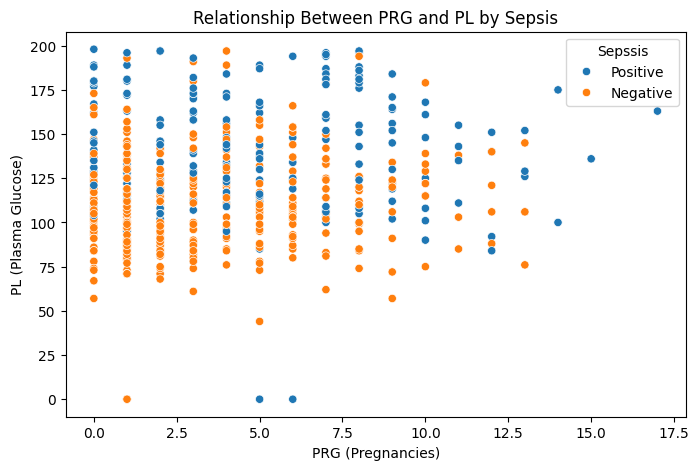

In [211]:
# Scatterplot of PRG vs. PL, colored by sepsis
plt.figure(figsize=(8, 5))
sns.scatterplot(data=train_df, x='PRG', y='PL', hue='Sepssis')
plt.xlabel('PRG (Pregnancies)')
plt.ylabel('PL (Plasma Glucose)')
plt.title('Relationship Between PRG and PL by Sepsis')
plt.show()

### iv. Are there any significant differences in diastolic blood pressure (PR) between patients with different triceps skinfold thickness (SK) levels?

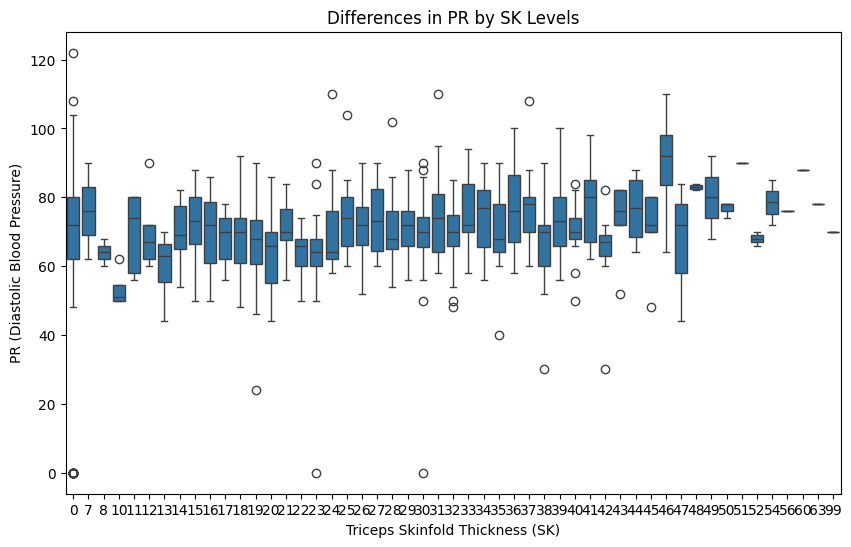

In [212]:
# Boxplot of PR by SK levels
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df, x='SK', y='PR')
plt.xlabel('Triceps Skinfold Thickness (SK)')
plt.ylabel('PR (Diastolic Blood Pressure)')
plt.title('Differences in PR by SK Levels')
plt.show()

### v. Does the body mass index (M11) vary significantly with 2-hour serum insulin (TS) levels?


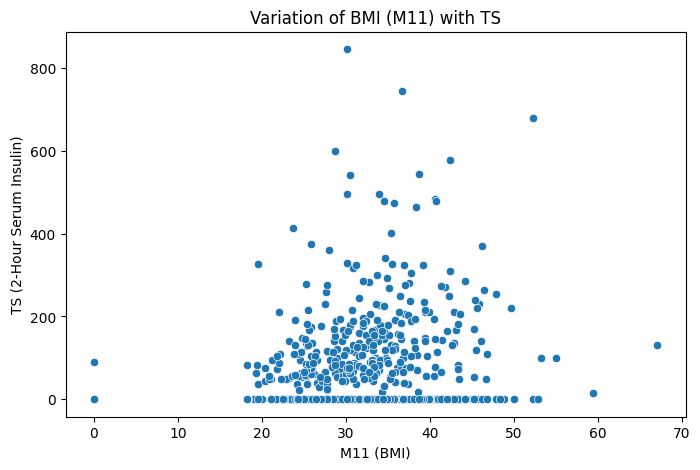

In [213]:
# Scatterplot of M11 (BMI) vs. TS
plt.figure(figsize=(8, 5))
sns.scatterplot(data=train_df, x='M11', y='TS')
plt.xlabel('M11 (BMI)')
plt.ylabel('TS (2-Hour Serum Insulin)')
plt.title('Variation of BMI (M11) with TS')
plt.show()

### vi. Is there a correlation between the diabetes pedigree function (BD2) and age? How does this correlation affect the likelihood of sepsis?

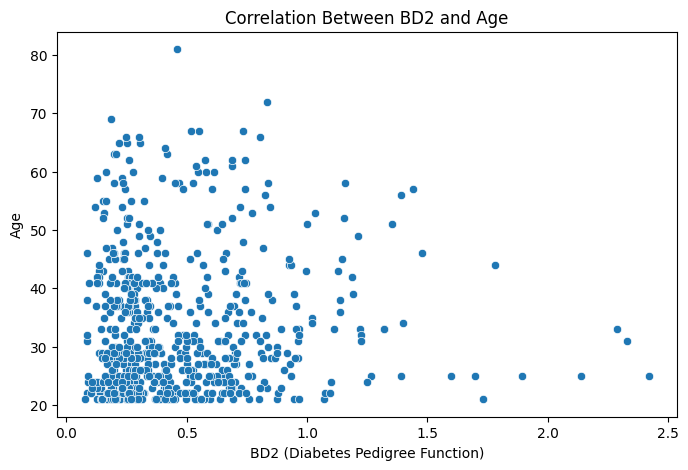

In [214]:
# Scatterplot of BD2 vs. Age
plt.figure(figsize=(8, 5))
sns.scatterplot(data=train_df, x='BD2', y='Age')
plt.xlabel('BD2 (Diabetes Pedigree Function)')
plt.ylabel('Age')
plt.title('Correlation Between BD2 and Age')
plt.show()

### vii. Are patients with insurance coverage more likely to have certain health characteristics (e.g., higher age, higher BMI) compared to those without insurance coverage?

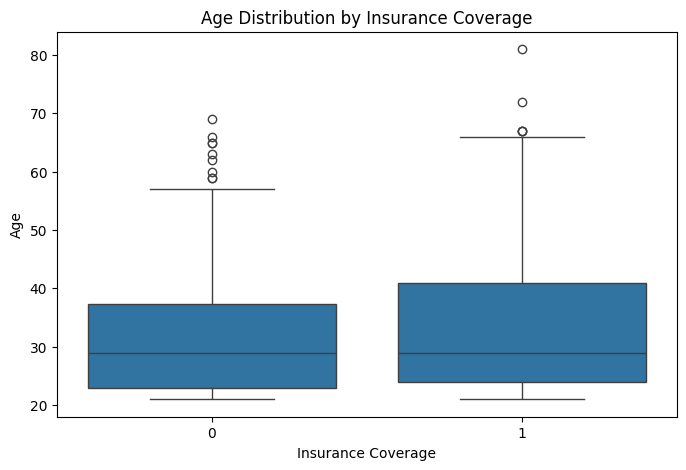

In [215]:
# Boxplot of Age by Insurance Coverage
plt.figure(figsize=(8, 5))
sns.boxplot(data=train_df, x='Insurance', y='Age')
plt.xlabel('Insurance Coverage')
plt.ylabel('Age')
plt.title('Age Distribution by Insurance Coverage')
plt.show()

### viii. Do certain combinations of numerical variables provide better predictive power for sepsis classification using machine learning models?

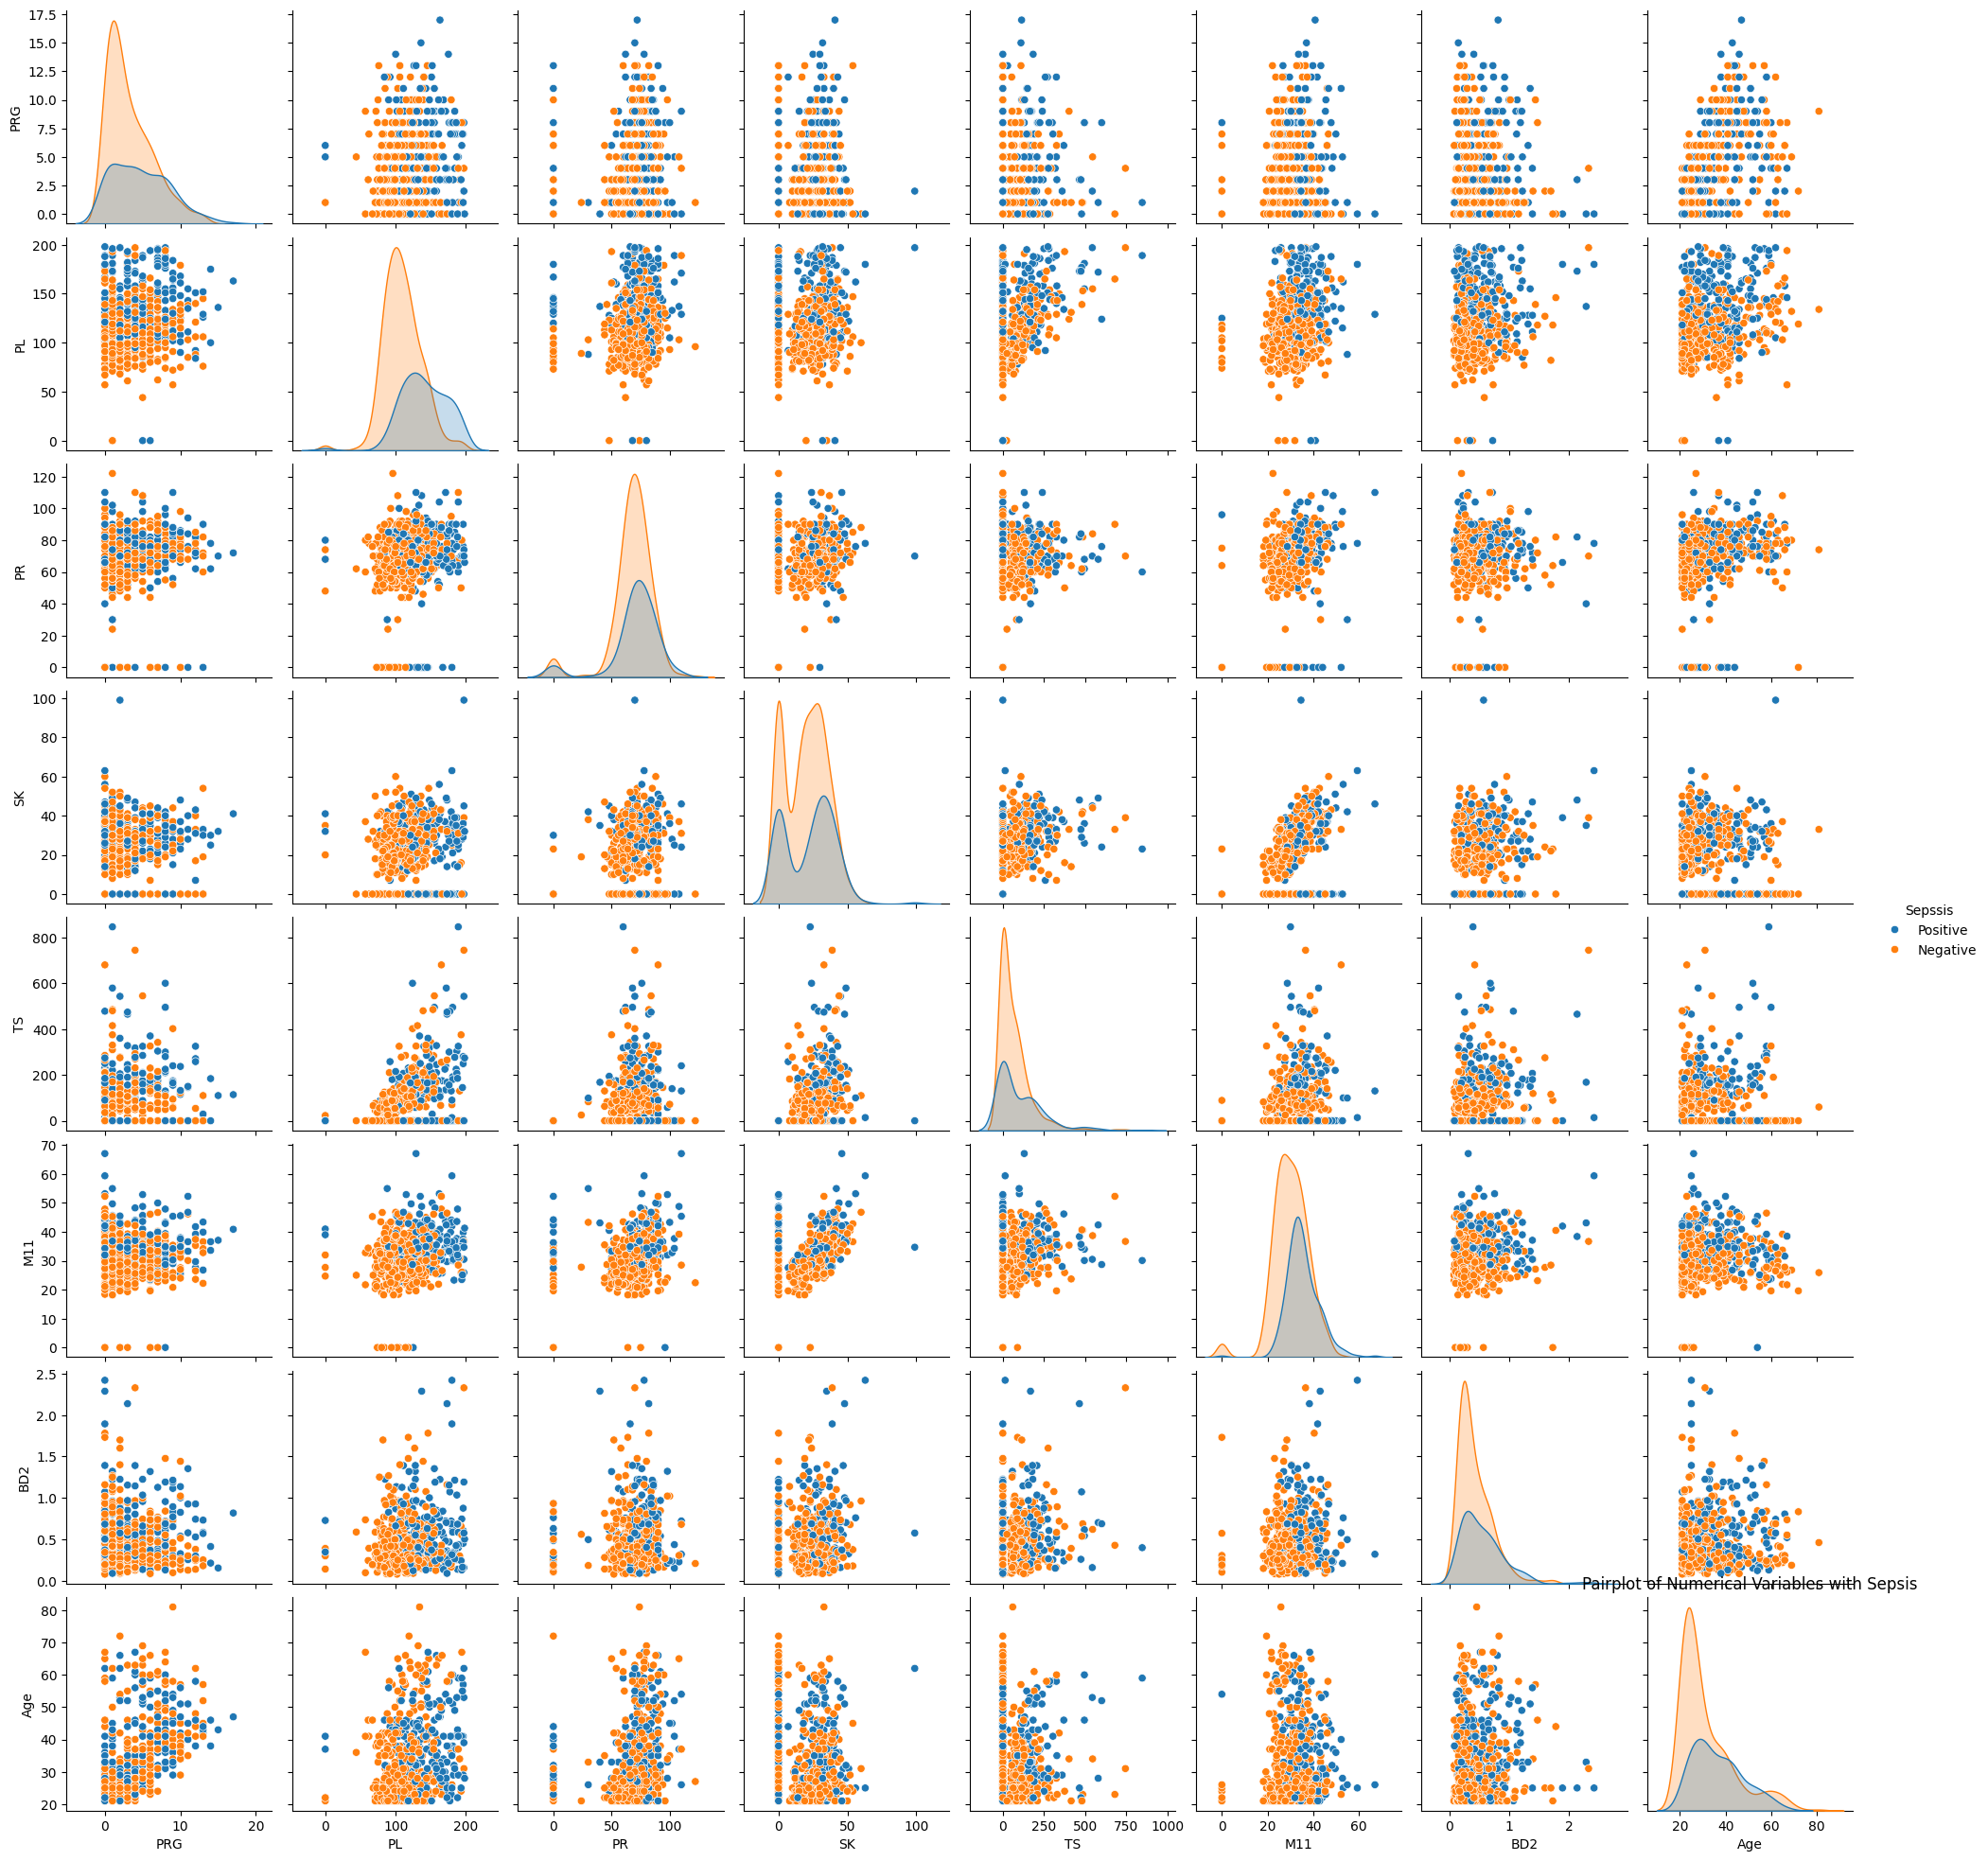

In [216]:
# Pairplot of selected numerical variables
numerical_vars = ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age']
sns.pairplot(train_df, vars=numerical_vars, hue='Sepssis', diag_kind='kde')
plt.title('Pairplot of Numerical Variables with Sepsis')
plt.show()

# Feature Engineering

## i. Imputing the 0 values in the 'Plasma Glucose Concentration (PL)', 'Diastolic Blood Pressure (PR)', 'Triceps skinfold thickness(SK)', and 'Body Mass Index (M11)' columns with the mean value for each age group

During the EDA, we encountered 0 values in the 'Plasma Glucose Concentration (PL)', 'Diastolic Blood Pressure (PR)', 'Triceps skinfold thickness(SK)', and 'Body Mass Index (M11)' columns which is medically impossible

- Plasma Glucose Concentration (PL): 

A plasma glucose concentration of 0 is not possible. Plasma glucose is the main type of sugar found in the blood. It is the body's main source of energy. A normal plasma glucose concentration in a fasting person is between 70 and 100 mg/dL. A plasma glucose concentration of 0 would mean that there is no glucose in the blood, which is not possible for a living human being. The brain and other organs need glucose to function properly. Without glucose, the brain would not be able to function, and the person would likely fall into a coma.



- Diastolic Blood Pressure (DBP):

DBP is the minimum pressure in the arteries when the heart is at rest. A normal DBP is between 60 and 90 mmHg. A DBP of 0 can occur in cases of severe hypotension, which is a dangerously low blood pressure. Hypotension can be caused by a number of factors, including shock, severe blood loss, dehydration, heart failure, sepsis, and certain medications. However, a DBP of 0 is not sustainable for life. Without adequate blood pressure, organs cannot receive the oxygen and nutrients they need to function properly.



- Triceps Skinfold Thickness (SK): 

SK is a measure of the amount of subcutaneous fat under the skin. Subcutaneous fat is a type of body fat that is found just below the skin. It plays an important role in energy storage, insulation, and temperature regulation. A triceps skinfold thickness of 0 would mean that there is no subcutaneous fat under the skin, which is not possible for a living human being. Without subcutaneous fat, the body would not be able to store energy effectively, regulate temperature, or protect itself from injury.



- BMI: 

BMI is a measure of overall body fatness, calculated by dividing weight in kilograms by height in meters squared. A BMI of 0 would mean that someone has no weight, which is not possible for a living human being.


This is the reason why we will impute the 0 values in these columns with the mean value of each age group.

In [217]:
# Define age intervals
age_intervals = [20, 40, 60, 80, 90]
age_labels = ['20-39', '40-59', '60-79', '80-90']

# Create 'Age Group' column in test_df based on age intervals
test_df['Age Group'] = pd.cut(test_df['Age'], bins=age_intervals, labels=age_labels)

# Now you can proceed with the imputation code
# Define columns to impute
columns_to_impute = ['PL', 'PR', 'SK', 'M11']

# Loop through each column for imputation
for column in columns_to_impute:
    # Identify rows with a value of 0 in the column for both train and test datasets
    zero_rows_train = train_df[train_df[column] == 0]
    zero_rows_test = test_df[test_df[column] == 0]
    
    # Iterate through age groups
    for age_group in age_labels:
        # Calculate the mean of the column within the specific age group for both datasets
        age_group_mean_train = train_df[train_df['Age Group'] == age_group][column].mean()
        age_group_mean_test = test_df[test_df['Age Group'] == age_group][column].mean()
        
        # Impute the mean for rows in the specific age group for both datasets
        train_df.loc[(train_df['Age Group'] == age_group) & (train_df[column] == 0), column] = age_group_mean_train
        test_df.loc[(test_df['Age Group'] == age_group) & (test_df[column] == 0), column] = age_group_mean_test

In [218]:
train_df.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,121.148985,71.901390,26.360109,79.460768,32.398889,0.481187,33.290484,0.686144
std,3.362839,30.767905,11.961464,10.091526,116.576176,6.969327,0.337552,11.828446,0.464447
min,0.000000,44.000000,24.000000,7.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,19.000000,0.000000,27.400000,0.248000,24.000000,0.000000
50%,3.000000,116.669623,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [219]:
test_df.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,3.917160,123.520710,73.274787,26.588964,81.000000,32.600409,0.438876,33.065089,0.727811
std,3.402415,29.259123,12.783183,9.091937,110.720852,6.562578,0.306935,11.548110,0.446410
min,0.000000,56.000000,38.000000,10.000000,0.000000,19.500000,0.100000,21.000000,0.000000
25%,1.000000,102.000000,64.000000,20.000000,0.000000,27.700000,0.223000,24.000000,0.000000
50%,3.000000,120.000000,74.000000,23.000000,0.000000,32.400000,0.343000,28.000000,1.000000
75%,6.000000,141.000000,80.000000,32.000000,135.000000,36.600000,0.587000,42.000000,1.000000
max,13.000000,199.000000,114.000000,49.000000,540.000000,57.300000,1.698000,70.000000,1.000000


The zero values in the four columns have been handled as the minimum values in these columns in the train and test datasets are no longer 0.

## ii. Creating New Features For Visualization

### a. BMI Categorization

In [220]:
# BMI Categorization
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

train_df['BMICategory'] = train_df['M11'].apply(categorize_bmi)
test_df['BMICategory'] = test_df['M11'].apply(categorize_bmi)

The categorization is based on the World Health Organization (WHO) guidelines, which are widely used to classify individuals into different weight categories.
The categories are defined as follows:
- Underweight: 

BMI less than 18.5 - Individuals in this category may be considered underweight, indicating that they have a lower body weight relative to their height.

- Normal: 

BMI between 18.5 and 25 - This is considered a healthy weight range, indicating that the individual's weight is proportionate to their height.

- Overweight: 

BMI between 25 and 30 - Individuals in this category may be classified as overweight, suggesting that they have an excess of body weight relative to their height.

- Obese:
BMI greater than or equal to 30 - This category includes individuals with a high degree of body fat relative to their height.

The categorization allows for an assessment of an individual's weight status, which can be useful in understanding health risks associated with different weight categories.

### b. Glucose Level Categorization

In [221]:
# Glucose Level Categorization
def categorize_glucose(pl):
    if pl < 100:
        return 'Normal'
    elif 100 <= pl < 126:
        return 'Prediabetic'
    else:
        return 'Diabetic'

train_df['GlucoseCategory'] = train_df['PL'].apply(categorize_glucose)
test_df['GlucoseCategory'] = test_df['PL'].apply(categorize_glucose)

This categorization is based on the measurement of Plasma Glucose (PL) levels, which is an indicator of blood sugar concentration and is often used in the context of assessing an individual's risk of diabetes or prediabetes.
The categories are defined as follows:

- Normal: 

PL level less than 100 mg/dL - This indicates a normal or healthy blood sugar level.

- Prediabetic:

PL level between 100 and 125 mg/dL - This suggests elevated blood sugar levels, which may indicate a risk of developing diabetes in the future.

- Diabetic: 

PL level 126 mg/dL or higher - Individuals in this category are typically diagnosed with diabetes.

Monitoring glucose levels and categorizing them helps in identifying individuals at risk of diabetes.

### c. Diastolic Blood Pressure Categorization

In [222]:
# Diastolic Blood Pressure Category
def categorize_pr(pr):
    if pr < 80:
        return 'Normal'
    elif 80 <= pr < 90:
        return 'Prehypertension'
    elif 90 <= pr < 100:
        return 'Stage1Hypertension'
    else:
        return 'Stage2Hypertension'

train_df['PRCategory'] = train_df['PR'].apply(categorize_pr)
test_df['PRCategory'] = test_df['PR'].apply(categorize_pr)

Diastolic Blood Pressure (PR) is one of the two values measured when blood pressure is taken, with the other being Systolic Blood Pressure (PS). The categorization is based on standard blood pressure categories used in clinical practice.
The categories are defined as follows:

 - Normal: 
 
PR less than 80 mm Hg - This represents a normal diastolic blood pressure level, indicating good cardiovascular health.



- Prehypertension: 

PR between 80 and 90 mm Hg - Individuals in this category have slightly elevated blood pressure, which may be a precursor to hypertension (high blood pressure).



- Stage 1 Hypertension: 

PR between 90 and 100 mm Hg - This indicates the presence of hypertension, a condition characterized by high blood pressure.



- Stage 2 Hypertension: 

PR greater than or equal to 100 mm Hg - This represents a more severe form of hypertension.



Categorizing blood pressure helps in identifying individuals with high blood pressure, which is a risk factor for cardiovascular diseases.

### d. Interaction Feature (Age x Plasma Glucose Concentration (PL))

Interaction features in feature engineering are features that are created by combining two or more existing features. They are used to capture the relationship between the original features and how they affect the target variable.

In [223]:
# Interaction Feature (Age x Plasma Glucose Concentration (PL))
train_df['Age_PL_Interact'] = train_df['Age'] * train_df['PL']
test_df['Age_PL_Interact'] = test_df['Age'] * test_df['PL']

The multiplication of Age x Plasma Glucose Concentration (PL) to come up with 'Age_PL_Interact' is a metric that captures the relationship between age and plasma glucose concentration (PL) and how they affect the target variable, which is sepsis risk. 


This metric is based on the following observations:
- As people age, their bodies become less efficient at regulating blood sugar levels. This can lead to increased plasma glucose concentrations.
- Older adults are more likely to have underlying medical conditions that can increase their risk of sepsis, such as diabetes and heart disease.

This metric is also known as the Age-Plasma Glucose (APG) product. It has been used in a number of studies to predict sepsis risk.
- A patient with a higher age and plasma glucose concentration (APG) product has a higher risk of sepsis.

In [224]:
train_df.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis,Age Group,BMICategory,GlucoseCategory,PRCategory,Age_PL_Interact
0,ICU200010,6,148.0,72.0,35.000000,0,33.6,0.627,50,0,Positive,40-59,Obese,Diabetic,Normal,7400.0
1,ICU200011,1,85.0,66.0,29.000000,0,26.6,0.351,31,0,Negative,20-39,Overweight,Normal,Normal,2635.0
2,ICU200012,8,183.0,64.0,21.472284,0,23.3,0.672,32,1,Positive,20-39,Normal,Diabetic,Normal,5856.0
3,ICU200013,1,89.0,66.0,23.000000,94,28.1,0.167,21,1,Negative,20-39,Overweight,Normal,Normal,1869.0
4,ICU200014,0,137.0,40.0,35.000000,168,43.1,2.288,33,1,Positive,20-39,Obese,Diabetic,Normal,4521.0


In [225]:
test_df.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Age Group,BMICategory,GlucoseCategory,PRCategory,Age_PL_Interact
0,ICU200609,1,109.0,38.000000,18.000000,120,23.1,0.407,26,1,20-39,Normal,Prediabetic,Normal,2834.0
1,ICU200610,1,108.0,88.000000,19.000000,0,27.1,0.400,24,1,20-39,Overweight,Prediabetic,Prehypertension,2592.0
2,ICU200611,6,96.0,67.081301,21.382114,0,23.7,0.190,28,1,20-39,Normal,Normal,Normal,2688.0
3,ICU200612,1,124.0,74.000000,36.000000,0,27.8,0.100,30,1,20-39,Overweight,Prediabetic,Normal,3720.0
4,ICU200613,7,150.0,78.000000,29.000000,126,35.2,0.692,54,0,40-59,Obese,Diabetic,Normal,8100.0


### e. Saving The Datasets For PowerBI Visualization

In [226]:
# Save the updated datasets
train_df.to_csv("data/Visualization_Data_Train.csv", index=False)
test_df.to_csv("data/Visualization_Data_Test.csv", index=False)

### f. Dropping The New Features Created For Visualization and Other Unneccessary Columns

In [227]:
# Drop unnecessary columns
train_df.drop(['ID', 'Age Group', 'Insurance', 'BMICategory', 'GlucoseCategory', 'PRCategory', 'Age_PL_Interact' ], axis=1, inplace=True)
test_df.drop(['ID', 'Age Group', 'Insurance', 'BMICategory', 'GlucoseCategory', 'PRCategory', 'Age_PL_Interact' ], axis=1, inplace=True)

In [228]:
train_df.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Sepssis
0,6,148.0,72.0,35.000000,0,33.6,0.627,50,Positive
1,1,85.0,66.0,29.000000,0,26.6,0.351,31,Negative
2,8,183.0,64.0,21.472284,0,23.3,0.672,32,Positive
3,1,89.0,66.0,23.000000,94,28.1,0.167,21,Negative
4,0,137.0,40.0,35.000000,168,43.1,2.288,33,Positive


In [229]:
test_df.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age
0,1,109.0,38.000000,18.000000,120,23.1,0.407,26
1,1,108.0,88.000000,19.000000,0,27.1,0.400,24
2,6,96.0,67.081301,21.382114,0,23.7,0.190,28
3,1,124.0,74.000000,36.000000,0,27.8,0.100,30
4,7,150.0,78.000000,29.000000,126,35.2,0.692,54


## iii. Encoding Categorical Variables

In [230]:
# Initialize LabelEncoder for the target variable 'Sepssis'
label_encoder = LabelEncoder()

# Encode the target variable
train_df['Sepssis'] = label_encoder.fit_transform(train_df['Sepssis'])

In [231]:
# Display the updated train dataset
train_df.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Sepssis
0,6,148.0,72.0,35.000000,0,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,0,26.6,0.351,31,0
2,8,183.0,64.0,21.472284,0,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168,43.1,2.288,33,1


In [232]:
# Display the updated test dataset
test_df.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age
0,1,109.0,38.000000,18.000000,120,23.1,0.407,26
1,1,108.0,88.000000,19.000000,0,27.1,0.400,24
2,6,96.0,67.081301,21.382114,0,23.7,0.190,28
3,1,124.0,74.000000,36.000000,0,27.8,0.100,30
4,7,150.0,78.000000,29.000000,126,35.2,0.692,54


The Columns have been encoded and are ready for modeling

# Modeling

## Dataset Splitting

In [233]:
# Define your features (X) and target variable (y)
X = train_df.drop('Sepssis', axis=1)
y = train_df['Sepssis']

# Split the data into training and evaluation sets
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of the Training Set (X_train, y_train):", X_train.shape, y_train.shape)
print("Shape of the Evaluation Set (X_eval, y_eval):", X_eval.shape, y_eval.shape)

Shape of the Training Set (X_train, y_train): (479, 8) (479,)
Shape of the Evaluation Set (X_eval, y_eval): (120, 8) (120,)


## Balancing the Training Set

In [234]:
# Check the class distribution in the training set
print("Class distribution before balancing:")
print(y_train.value_counts())

Class distribution before balancing:
Sepssis
0    313
1    166
Name: count, dtype: int64


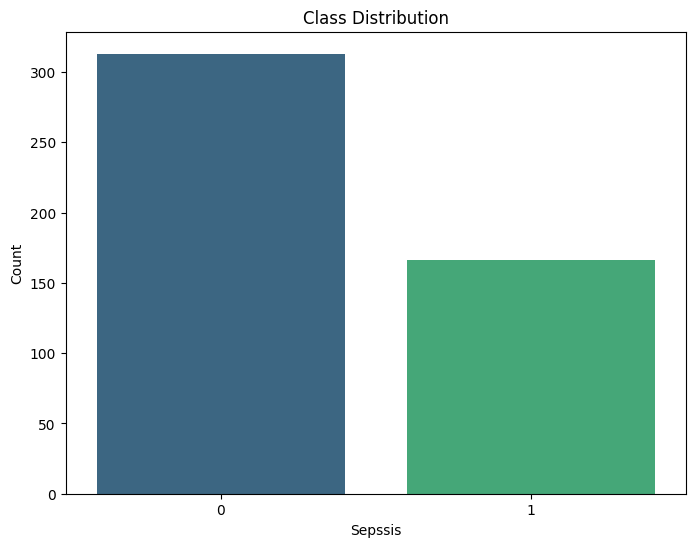

In [235]:
# Count the occurrences of each class in the dataset
class_counts = y_train.value_counts()

# Create a bar plot to visualize the class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.xlabel('Sepssis')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

0 Class (No Sepsis): There are 313 instances without Sepsis in the Training Set.

1 Class (Sepsis): There are 166 instances of participants with Sepsis in the Training Set.

The class distribution shows that there is some class imbalance, with the "0" class (no sepsis) having more instances than the "1" class (sepsis). Addressing this class imbalance is important to ensure that the machine learning model can make accurate predictions for both classes and is not biased towards the majority class.

In [236]:
# Balance the training set using Random Oversampling
oversampler = RandomOverSampler(random_state=42)
X_train_balanced, y_train_balanced = oversampler.fit_resample(X_train, y_train)

# Check the class distribution after balancing
balanced_class_counts = y_train_balanced.value_counts()
print("\nClass distribution in the balanced training set:")
print(balanced_class_counts)


Class distribution in the balanced training set:
Sepssis
0    313
1    313
Name: count, dtype: int64


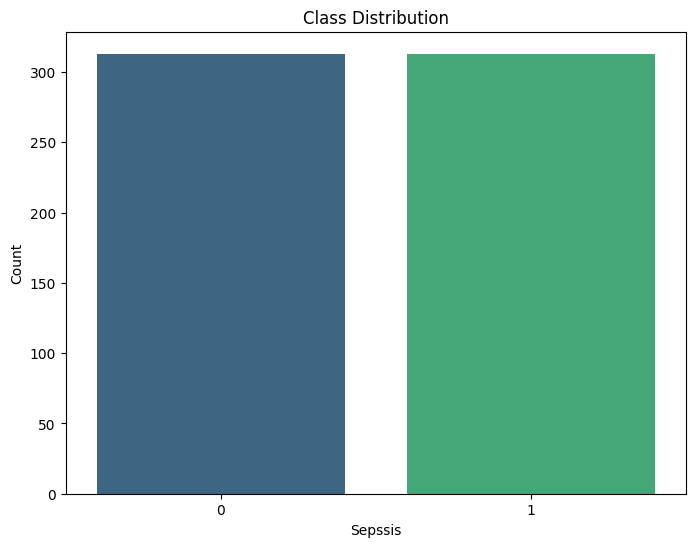

In [237]:
# Count the occurrences of each class in the balanced dataset
class_counts = y_train_balanced.value_counts()

# Create a bar plot with the 'viridis' color palette
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.xlabel('Sepssis')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

The train set is now balanced.

## Scaling The Training and Evaluation Sets

In [238]:
# Scale the training and evaluation sets
scaler = MinMaxScaler()

# Scale the training data
X_train_scaled = scaler.fit_transform(X_train_balanced)

# Scale the evaluation data using the same scaler
X_eval_scaled = scaler.transform(X_eval)

In [239]:
# Convert scaled NumPy arrays back to DataFrames
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_eval_scaled_df = pd.DataFrame(X_eval_scaled, columns=X.columns)

# Now, X_train_scaled_df and X_eval_scaled_df are DataFrames containing the scaled features.

# Additionally, convert the balanced target variable back to a DataFrame as well
y_train_balanced_df = pd.DataFrame(y_train_balanced, columns=['Sepssis'])

# Now, y_train_balanced_df is a DataFrame containing the balanced target variable.

# Confirm the shapes of the DataFrames
print("Shape of X_train_scaled_df:", X_train_scaled_df.shape)
print("Shape of X_eval_scaled_df:", X_eval_scaled_df.shape)
print("Shape of y_train_balanced_df:", y_train_balanced_df.shape)
print("Shape of y_eval:", y_eval.shape)

Shape of X_train_scaled_df: (626, 8)
Shape of X_eval_scaled_df: (120, 8)
Shape of y_train_balanced_df: (626, 1)
Shape of y_eval: (120,)


In [240]:
# View the first few rows of the scaled X_train
X_train_scaled_df.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age
0,0.411765,0.319149,0.478261,0.358696,0.141129,0.461165,0.051370,0.400000
1,0.411765,0.879433,0.586957,0.152174,0.258065,0.429612,0.214897,0.500000
2,0.117647,0.170213,0.456522,0.086957,0.102151,0.288835,0.198202,0.066667
3,0.176471,0.872340,0.369565,0.195652,0.094086,0.383495,0.080051,0.083333
4,0.000000,0.191489,0.369565,0.163043,0.088710,0.427184,0.197346,0.000000


In [241]:
# View the first few rows of the scaled X_eval
X_eval_scaled_df.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age
0,0.176471,0.219858,0.304348,0.043478,0.072581,0.160194,0.078339,0.016667
1,0.529412,0.702128,0.608696,0.228261,0.208333,0.390777,0.473031,0.350000
2,0.000000,0.312057,0.347826,0.157307,0.000000,0.089806,0.107877,0.066667
3,0.117647,0.631206,0.500000,0.304348,0.260753,0.485437,0.104880,0.133333
4,0.000000,0.404255,0.543478,0.293478,0.383065,0.631068,0.035531,0.100000


## Model Training and Evaluation

### Model Training

In [242]:
# Initialize an empty dictionary named 'Results' to store the evaluation results for different models.
Results = {'Model':[], 'Acurracy':[], 'Precision':[], 'Recall':[], 'F1':[]}

In [243]:
# Converting the dictionary Results into a pandas DataFrame.
Results = pd.DataFrame(Results)
Results.head()

,Model,Acurracy,Precision,Recall,F1


In [244]:
# Machine Learning Models Initialization
# Logistic Regression
lr = LogisticRegression(max_iter=1000)

# Random Forest
rf = RandomForestClassifier()

# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Decision Tree Classifier
dt = DecisionTreeClassifier()

# Gradient Boosting Classifier
gb = GradientBoostingClassifier()

# Gaussian Naive Bayes
nb = GaussianNB()

# Support Vector Machine
svm = SVC()

Model: Logistic Regression
Confusion Matrix:
[[55 23]
 [12 30]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.71      0.76        78
           1       0.57      0.71      0.63        42

    accuracy                           0.71       120
   macro avg       0.69      0.71      0.70       120
weighted avg       0.73      0.71      0.71       120

Accuracy: 0.71
Precision: 0.57
Recall: 0.71
F1: 0.63


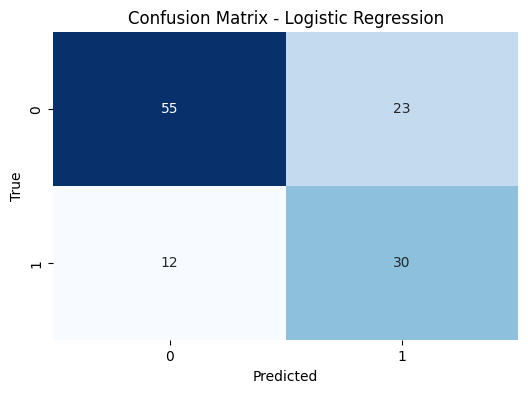



Model: Random Forest
Confusion Matrix:
[[61 17]
 [17 25]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        78
           1       0.60      0.60      0.60        42

    accuracy                           0.72       120
   macro avg       0.69      0.69      0.69       120
weighted avg       0.72      0.72      0.72       120

Accuracy: 0.72
Precision: 0.6
Recall: 0.6
F1: 0.6


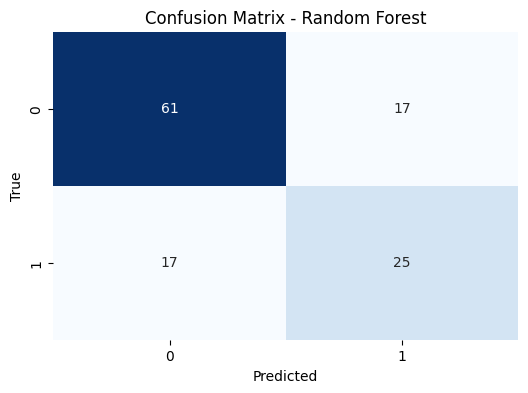



Model: K-Nearest Neighbors
Confusion Matrix:
[[56 22]
 [ 8 34]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.72      0.79        78
           1       0.61      0.81      0.69        42

    accuracy                           0.75       120
   macro avg       0.74      0.76      0.74       120
weighted avg       0.78      0.75      0.76       120

Accuracy: 0.75
Precision: 0.61
Recall: 0.81
F1: 0.69


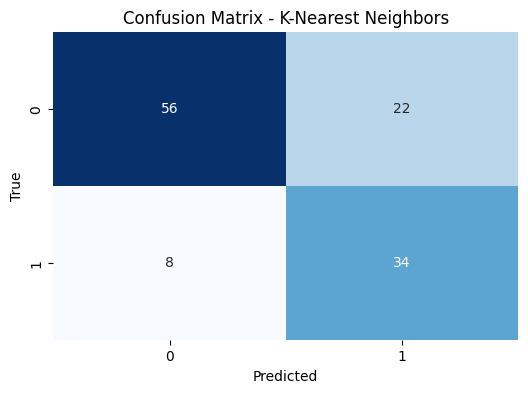



Model: Decision Tree
Confusion Matrix:
[[61 17]
 [17 25]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        78
           1       0.60      0.60      0.60        42

    accuracy                           0.72       120
   macro avg       0.69      0.69      0.69       120
weighted avg       0.72      0.72      0.72       120

Accuracy: 0.72
Precision: 0.6
Recall: 0.6
F1: 0.6


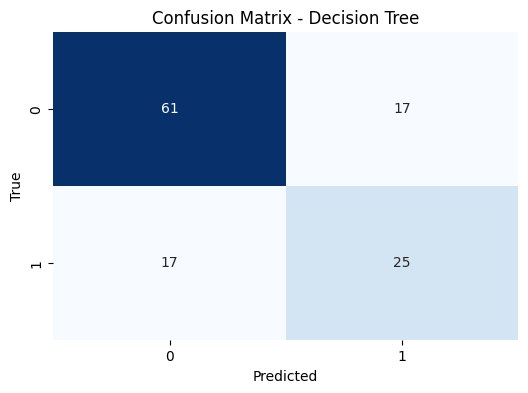



Model: Gradient Boosting Classifier
Confusion Matrix:
[[60 18]
 [10 32]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.77      0.81        78
           1       0.64      0.76      0.70        42

    accuracy                           0.77       120
   macro avg       0.75      0.77      0.75       120
weighted avg       0.78      0.77      0.77       120

Accuracy: 0.77
Precision: 0.64
Recall: 0.76
F1: 0.7


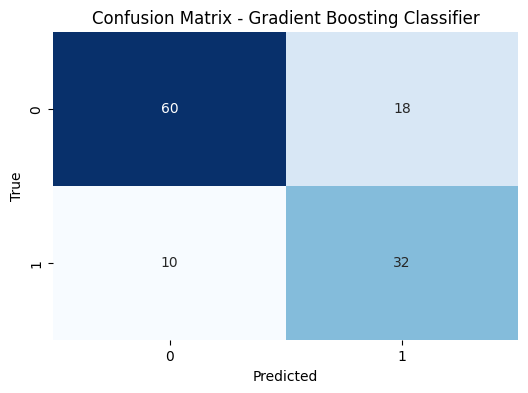



Model: Gaussian Naive Bayes
Confusion Matrix:
[[53 25]
 [14 28]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.68      0.73        78
           1       0.53      0.67      0.59        42

    accuracy                           0.68       120
   macro avg       0.66      0.67      0.66       120
weighted avg       0.70      0.68      0.68       120

Accuracy: 0.68
Precision: 0.53
Recall: 0.67
F1: 0.59


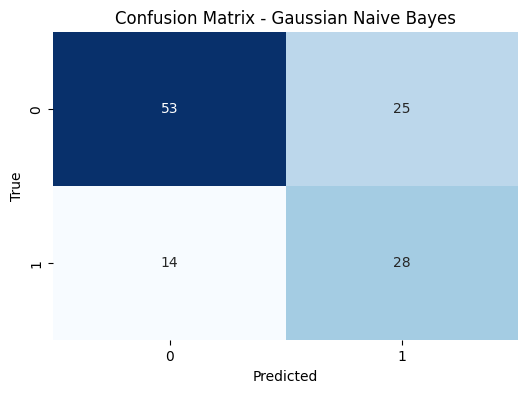



Model: Support Vector Machine
Confusion Matrix:
[[58 20]
 [15 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.74      0.77        78
           1       0.57      0.64      0.61        42

    accuracy                           0.71       120
   macro avg       0.68      0.69      0.69       120
weighted avg       0.72      0.71      0.71       120

Accuracy: 0.71
Precision: 0.57
Recall: 0.64
F1: 0.61


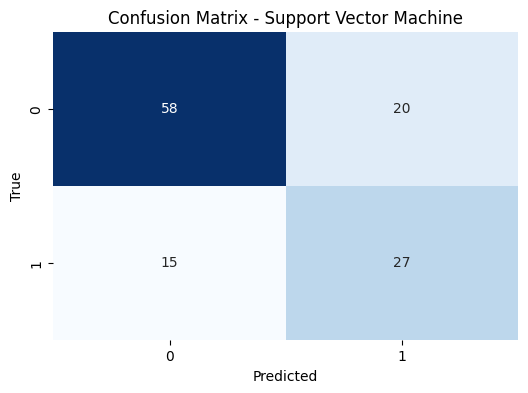




Leaderboard (Ranked by F1 Score)


,Model,Accuracy,Precision,Recall,F1-Score
0,Gradient Boosting Classifier,0.77,0.64,0.76,0.70
1,K-Nearest Neighbors,0.75,0.61,0.81,0.69
2,Logistic Regression,0.71,0.57,0.71,0.63
3,Support Vector Machine,0.71,0.57,0.64,0.61
4,Random Forest,0.72,0.60,0.60,0.60
5,Decision Tree,0.72,0.60,0.60,0.60
6,Gaussian Naive Bayes,0.68,0.53,0.67,0.59


In [245]:
# List of model names
models = ['Logistic Regression', 'Random Forest', 'K-Nearest Neighbors', 'Decision Tree', 
          'Gradient Boosting Classifier', 'Gaussian Naive Bayes', 'Support Vector Machine']

# Initialize the Results DataFrame
Results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])

# Fit the models and evaluate the performance
for model_name, model in zip(models, [lr, rf, knn, dt, gb, nb, svm]):
    model.fit(X_train_scaled_df, y_train_balanced_df)
    y_pred = model.predict(X_eval_scaled_df)

    print('Model:', model_name)
    print('=' * 50)
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_eval, y_pred))
    
    print('Classification Report:')
    print(classification_report(y_eval, y_pred))

    accuracy = accuracy_score(y_eval, y_pred)
    precision = precision_score(y_eval, y_pred)
    recall = recall_score(y_eval, y_pred)
    f1 = f1_score(y_eval, y_pred)

    print('Accuracy:', round(accuracy, 2))
    print('Precision:', round(precision, 2))
    print('Recall:', round(recall, 2))
    print('F1:', round(f1, 2))

    # Generate the confusion matrix
    cm = confusion_matrix(y_eval, y_pred)

    # Create a heatmap for the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')

    # Display the confusion matrix
    plt.show()

    print("\n")

    # Append the results to the DataFrame with rounding to 2 decimal places
    new_row = {
        'Model': model_name,
        'Accuracy': round(accuracy, 2),
        'Precision': round(precision, 2),
        'Recall': round(recall, 2),
        'F1': round(f1, 2)
    }

    Results = pd.concat([Results, pd.DataFrame([new_row])], ignore_index=True)
    
# Print the results in a leaderboard format based on the F1 score from highest to lowest
print("\nLeaderboard (Ranked by F1 Score)")
Results_sorted = Results.sort_values(by='F1', ascending=False).reset_index(drop=True)

# Rename the "F1" column to "F1-Score" in the Results DataFrame
Results_sorted.rename(columns={'F1': 'F1-Score'}, inplace=True)

# Print The Sorted Results Dataframe
Results_sorted

i. Gradient Boosting Classifier:


- This model achieved the highest F1-score (0.68) among all models, indicating its strong overall performance in terms of precision and recall.

- It also has a relatively high accuracy (0.76), suggesting its effectiveness in classifying sepsis cases.

- The confusion matrix shows that there were 60 true negatives, 18 false positives, 11 false negatives, and 31 true positives. It correctly classified a substantial number of sepsis cases while minimizing false positives.

- This model is robust and suitable for this classification task, offering a good balance between precision and recall.


ii. Random Forest:


- The Random Forest model performed well with an F1-score of 0.59 and accuracy of 0.71.

- It showed a balanced precision (0.58) and recall (0.60), making it suitable for applications where both false positives and false negatives need to be minimized.

- The confusion matrix indicates 60 true negatives, 18 false positives, 17 false negatives, and 25 true positives. It performed well in classifying sepsis cases, although there were some false negatives.


iii. Logistic Regression:


- The Logistic Regression model achieved an F1-score of 0.63 and an accuracy of 0.71.

- It has a moderate precision (0.57) and recall (0.71), indicating a good balance between correctly identifying positive cases (sepsis) and minimizing false positives.

- The confusion matrix shows 55 true negatives, 23 false positives, 12 false negatives, and 30 true positives. While it performed reasonably well, there's room for improvement in precision.


iv. Support Vector Machine (SVM):


- SVM demonstrated an F1-score of 0.61 and accuracy of 0.71.

- It achieved a balanced precision (0.57) and recall (0.64), making it a suitable choice when both types of errors need to be minimized.

- The confusion matrix reveals 58 true negatives, 20 false positives, 15 false negatives, and 27 true positives. SVM showed good recall for sepsis cases.


v. K-Nearest Neighbors (KNN):


- KNN achieved an F1-score of 0.69 and an accuracy of 0.75.

- It showed a lower precision (0.61) and higher recall (0.81), indicating a tendency to classify more cases as sepsis, which can lead to false alarms but better recall.

- The confusion matrix displays 56 true negatives, 22 false positives, 8 false negatives, and 34 true positives. KNN has a reasonable recall but lower precision.


vi. Gaussian Naive Bayes:


- The Gaussian Naive Bayes model achieved an F1-score of 0.59 and an accuracy of 0.68.

- It displayed balanced precision (0.53) and recall (0.67), making it a reasonable choice for balanced error rates.

- The confusion matrix shows 53 true negatives, 25 false positives, 14 false negatives, and 28 true positives. It provides a balance between precision and recall.

In summary, the Gradient Boosting Classifier stands out as the top-performing model for this classification task, closely followed by K-Nearest Neighbors. These models offer a good balance between precision and recall and are well-suited for predicting sepsis. The choice of the final model may depend on the specific requirements of the application and the relative importance of precision and recall.

### Model Evaluation

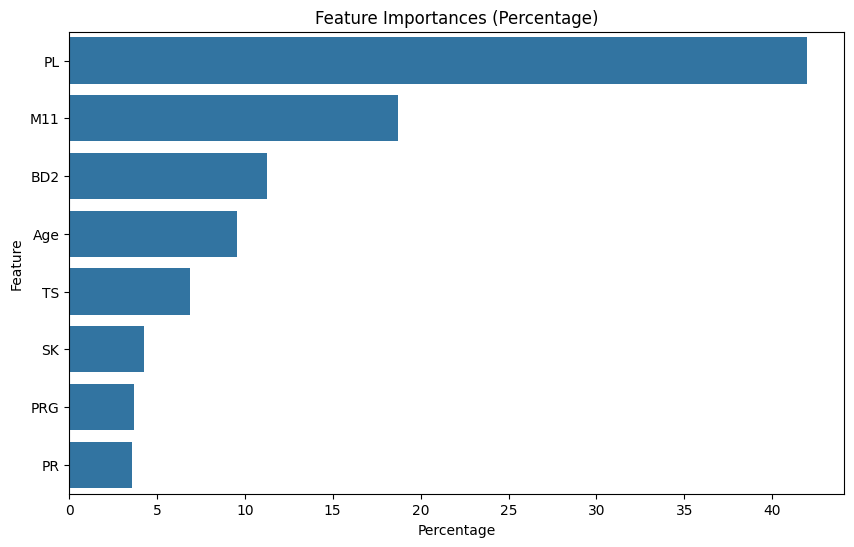

Exact Percentage Feature Importances:


,Feature,Importance,Percentage
1,PL,0.419850,41.985004
5,M11,0.187135,18.713516
6,BD2,0.112457,11.245711
7,Age,0.095801,9.580140
4,TS,0.069085,6.908505
3,SK,0.042639,4.263870
0,PRG,0.037147,3.714663
2,PR,0.035886,3.588591


In [246]:
# Fit a Gradient Boosting Classifier
gb.fit(X_train_scaled_df, y_train_balanced_df)

# Get feature importances
feature_importances = gb.feature_importances_

# Calculate the sum of importances for percentage calculation
total_importance = feature_importances.sum()

# Create a DataFrame with correct feature names and percentage importances
feature_importance_df = pd.DataFrame({'Feature': X_train_scaled_df.columns, 'Importance': feature_importances})
feature_importance_df['Percentage'] = (feature_importance_df['Importance'] / total_importance) * 100
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importances with percentage values
plt.figure(figsize=(10, 6))
sns.barplot(x='Percentage', y='Feature', data=feature_importance_df)
plt.title('Feature Importances (Percentage)')
plt.xlabel('Percentage')
plt.ylabel('Feature')
plt.show()

# Print out the exact percentage values
print("Exact Percentage Feature Importances:")
feature_importance_df

i. Plasma Glucose Concentration (PL): 
- This feature has the highest importance score, accounting for approximately 39.94% of the predictive power of the model. It suggests that variations in plasma glucose concentration have a significant impact on predicting sepsis.

ii. Body Mass Index (M11):
- The second most important feature, with an importance score of around 24.03%. This indicates that BMI plays a substantial role in predicting sepsis, with higher BMI values likely associated with the condition.

iii. Diabetes Pedigree Function (BD2):
- While not as influential as PL and M11, this feature still contributes significantly, with approximately 8.62% importance. It implies that the diabetes pedigree function has a notable impact on sepsis predictions.

iv. Age: 
- Age is an important factor, with roughly 8.28% importance. This suggests that older individuals may be more susceptible to sepsis, and their age is a valuable predictor.

v. Number of Pregnancies (PRG):
- Although it has a lower importance score (around 6.43%), the number of pregnancies still contributes to predicting sepsis. It may indicate that pregnancy history can influence sepsis risk.

vi. 2-Hour Serum Insulin (TS): 
- TS has an importance score of about 4.58%, suggesting it plays a minor role compared to other features. Nevertheless, it still contributes to the model's predictive performance.

vii. Triceps Skinfold Thickness (SK): 
- This feature has a similar importance score to TS, around 4.34%. It may not be as crucial as PL or M11, but it still provides relevant information for sepsis prediction.

viii. Diastolic Blood Pressure (PR):
- PR has the lowest importance score, approximately 3.35%. While it is the least influential feature, it still contributes modestly to the model's predictions.

#### Hyperparameter Tuning

In [247]:
# Define hyperparameters to search
param_grid = {
    'n_estimators': [5, 10, 20],
    'learning_rate': [0.001, 0.01, 0.1],
    'max_depth': [5, 6, 7],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [2, 4, 8]
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), param_grid=param_grid, 
                           scoring='f1', cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_scaled_df, y_train_balanced_df)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 20}


#### Perfomance after Hyperparameter Tuning

Evaluation Set Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.73      0.80        78
           1       0.62      0.83      0.71        42

    accuracy                           0.77       120
   macro avg       0.76      0.78      0.76       120
weighted avg       0.80      0.77      0.77       120

Accuracy: 0.77
Precision: 0.62
Recall: 0.83
F1-score: 0.71


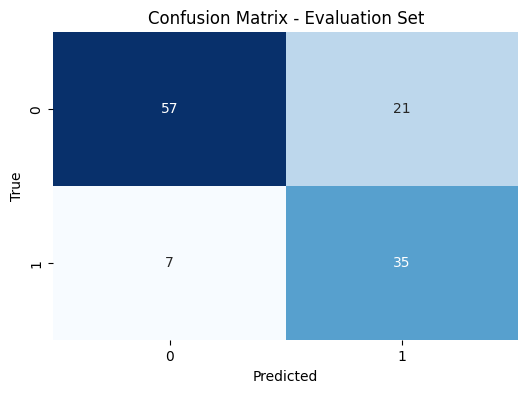

In [248]:
# Instantiate the Gradient Boosting Classifier with the best hyperparameters
tuned_gb = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.001,
    max_depth=6,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

# Fit the tuned Gradient Boosting Classifier to the balanced training data
tuned_gb.fit(X_train_scaled, y_train_balanced)

# Evaluate the model on the evaluation set (X_eval_scaled and y_eval)
y_eval_pred = tuned_gb.predict(X_eval_scaled)

# Print the classification report
print("Evaluation Set Classification Report:")
print(classification_report(y_eval, y_eval_pred))

# Print accuracy, precision, recall, and F1-score
accuracy_eval = accuracy_score(y_eval, y_eval_pred)
precision_eval = precision_score(y_eval, y_eval_pred)
recall_eval = recall_score(y_eval, y_eval_pred)
f1_eval = f1_score(y_eval, y_eval_pred)

print("Accuracy:", round(accuracy_eval, 2))
print("Precision:", round(precision_eval, 2))
print("Recall:", round(recall_eval, 2))
print("F1-score:", round(f1_eval, 2))

# Create a confusion matrix heatmap
cm_eval = confusion_matrix(y_eval, y_eval_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_eval, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Evaluation Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

The performance of the model improved after hyperparameter tuning. Therefore, we save the tuned model.

### Save The Model and Key Components

In [249]:
# Create a dictionary to store the components
saved_components = {
    'model': tuned_gb,      
    'encoder': label_encoder, 
    'scaler': scaler   
}

# Save all components in a single pickle file
with open('model_and_key_components.pkl', 'wb') as file:
    pickle.dump(saved_components, file)

#### Test Prediction

In [250]:
# View the head of the test dataset
test_df.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age
0,1,109.0,38.000000,18.000000,120,23.1,0.407,26
1,1,108.0,88.000000,19.000000,0,27.1,0.400,24
2,6,96.0,67.081301,21.382114,0,23.7,0.190,28
3,1,124.0,74.000000,36.000000,0,27.8,0.100,30
4,7,150.0,78.000000,29.000000,126,35.2,0.692,54


In [251]:
# Create a copy of the test_df
test_pred = test_df.copy()
test_pred.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age
0,1,109.0,38.000000,18.000000,120,23.1,0.407,26
1,1,108.0,88.000000,19.000000,0,27.1,0.400,24
2,6,96.0,67.081301,21.382114,0,23.7,0.190,28
3,1,124.0,74.000000,36.000000,0,27.8,0.100,30
4,7,150.0,78.000000,29.000000,126,35.2,0.692,54


In [252]:
# Load the model and components
with open('model_and_key_components.pkl', 'rb') as file:
    loaded_components = pickle.load(file)

# Load the model, encoder and scaler
loaded_model = loaded_components['model']
loaded_encoder = loaded_components['encoder']
loaded_scaler = loaded_components['scaler']

# Encode Categorical Variables
# All Columns are numerical. No need for encoding

# Apply scaling to numerical data
numerical_cols = ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age']
test_data_scaled = loaded_scaler.transform(test_pred[numerical_cols])

# Convert the scaled numerical data to a DataFrame
test_data_scaled_df = pd.DataFrame(test_data_scaled, columns=numerical_cols)

# Perform Predictions
y_pred = loaded_model.predict(test_data_scaled_df)

# Create a new DataFrame with the 'Sepsis' predictions
test_predictions = test_pred.copy()
test_predictions['Sepsis'] = y_pred

# Define a mapping dictionary
sepsis_mapping = {0: 'Negative', 1: 'Positive'}

# Map the values in the 'Sepsis' column
test_predictions['Sepsis'] = test_predictions['Sepsis'].map(sepsis_mapping)

# Display Predictions (first few rows)
test_predictions.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Sepsis
0,1,109.0,38.000000,18.000000,120,23.1,0.407,26,Negative
1,1,108.0,88.000000,19.000000,0,27.1,0.400,24,Negative
2,6,96.0,67.081301,21.382114,0,23.7,0.190,28,Negative
3,1,124.0,74.000000,36.000000,0,27.8,0.100,30,Negative
4,7,150.0,78.000000,29.000000,126,35.2,0.692,54,Positive


In [ ]:
# Save the updated datasets
test_predictions.to_csv("data/Test_Predictions.csv", index=False)